# import the libraries .

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from datasist.structdata import detect_outliers
from sklearn.impute import SimpleImputer
import warnings
warnings.simplefilter('ignore')

## read the data set .

In [2]:
df = pd.read_csv('Egypt_Houses_Price.csv')
df

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Duplex,4000000,3.0,3.0,400.0,No,7,Unknown,Cash,Ready to move,Finished,Nasr City
1,Apartment,4000000,3.0,3.0,160.0,No,10+,Unknown,Cash,Ready to move,Finished,Camp Caesar
2,Apartment,2250000,3.0,2.0,165.0,No,1,Unknown,Cash,Ready to move,Finished,Smoha
3,Apartment,1900000,3.0,2.0,230.0,No,10,Unknown,Cash,Ready to move,Finished,Nasr City
4,Apartment,5800000,2.0,3.0,160.0,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa
...,...,...,...,...,...,...,...,...,...,...,...,...
27356,Town House,890000,3.0,2.0,240.0,Unknown,Unknown,Unknown,Unknown Payment,Unknown,Unknown,North Coast
27357,Town House,4000000,4.0,3.0,218.0,Unknown,Unknown,Unknown,Cash or Installment,Unknown,Finished,New Cairo - El Tagamoa
27358,Twin House,13800000,3.0,4.0,308.0,No,Unknown,Cairo Festival City,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa
27359,Stand Alone Villa,35000000,4.0,4.0,478.0,Unknown,Unknown,Unknown,Unknown Payment,Unknown,Finished,Mokattam


## replace values like "Unknown" into null values .

In [3]:
df = pd.read_csv('Egypt_Houses_Price.csv', na_values= 'Unknown')
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Duplex,4000000.0,3.0,3.0,400.0,No,7,NaN,Cash,Ready to move,Finished,Nasr City
1,Apartment,4000000.0,3.0,3.0,160.0,No,10+,NaN,Cash,Ready to move,Finished,Camp Caesar
2,Apartment,2250000.0,3.0,2.0,165.0,No,1,NaN,Cash,Ready to move,Finished,Smoha
3,Apartment,1900000.0,3.0,2.0,230.0,No,10,NaN,Cash,Ready to move,Finished,Nasr City
4,Apartment,5800000.0,2.0,3.0,160.0,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa


## check for duplicte .

In [4]:
df.duplicated().sum()

1641

In [5]:
df.drop_duplicates(inplace= True)

In [6]:
df.duplicated().sum()

0

In [7]:
df

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Duplex,4000000.0,3.0,3.0,400.0,No,7,NaN,Cash,Ready to move,Finished,Nasr City
1,Apartment,4000000.0,3.0,3.0,160.0,No,10+,NaN,Cash,Ready to move,Finished,Camp Caesar
2,Apartment,2250000.0,3.0,2.0,165.0,No,1,NaN,Cash,Ready to move,Finished,Smoha
3,Apartment,1900000.0,3.0,2.0,230.0,No,10,NaN,Cash,Ready to move,Finished,Nasr City
4,Apartment,5800000.0,2.0,3.0,160.0,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa
...,...,...,...,...,...,...,...,...,...,...,...,...
27356,Town House,890000.0,3.0,2.0,240.0,NaN,NaN,NaN,Unknown Payment,NaN,Unknown,North Coast
27357,Town House,4000000.0,4.0,3.0,218.0,NaN,NaN,NaN,Cash or Installment,NaN,Finished,New Cairo - El Tagamoa
27358,Twin House,13800000.0,3.0,4.0,308.0,No,NaN,Cairo Festival City,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa
27359,Stand Alone Villa,35000000.0,4.0,4.0,478.0,NaN,NaN,NaN,Unknown Payment,NaN,Finished,Mokattam


## check the information of the data .

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25720 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            25716 non-null  object 
 1   Price           25713 non-null  float64
 2   Bedrooms        25517 non-null  object 
 3   Bathrooms       25549 non-null  object 
 4   Area            25251 non-null  float64
 5   Furnished       17804 non-null  object 
 6   Level           15875 non-null  object 
 7   Compound        15216 non-null  object 
 8   Payment_Option  25720 non-null  object 
 9   Delivery_Date   16378 non-null  object 
 10  Delivery_Term   25720 non-null  object 
 11  City            25720 non-null  object 
dtypes: float64(2), object(10)
memory usage: 2.6+ MB


## check the the missing values .

In [9]:
df.isnull().sum()

Type                  4
Price                 7
Bedrooms            203
Bathrooms           171
Area                469
Furnished          7916
Level              9845
Compound          10504
Payment_Option        0
Delivery_Date      9342
Delivery_Term         0
City                  0
dtype: int64

In [10]:
df.isnull().sum()*100 / len(df)

Type               0.015552
Price              0.027216
Bedrooms           0.789269
Bathrooms          0.664852
Area               1.823484
Furnished         30.777605
Level             38.277605
Compound          40.839813
Payment_Option     0.000000
Delivery_Date     36.321928
Delivery_Term      0.000000
City               0.000000
dtype: float64

## Data preprocessing .
### * Replace the same values that in different forms , ( upper & lower )  .
### * going to replace (Unknown Payment) values to (NaN) its the same meaning .

In [11]:
df['Type'] = df['Type'].replace('Twin house', 'Twin House')
df['Type'] = df['Type'].replace('Standalone Villa', 'Stand Alone Villa')

In [12]:
df['Payment_Option'] = df['Payment_Option'].replace('Unknown Payment', np.nan)
df['Delivery_Term'] = df['Delivery_Term'].replace('Unknown ', np.nan)

In [13]:
city_index = df[df['City'] == '(View phone number)'].index
city_index

Int64Index([16977, 17063, 17205, 17209, 17444, 17662, 17664, 17668, 17729,
            17937, 17982, 18087, 18714, 19023, 19033, 19172, 19420, 19972,
            20600, 20907, 20910, 20912, 21354, 21522, 21877, 21902, 22473,
            22547, 23155, 23207, 23325, 23739, 24155, 24157, 24612, 24613,
            24614, 24840, 24904, 25105, 25119, 25306, 25510, 25522, 25687,
            25819, 25884, 25885, 25887, 25930, 25932, 25933, 26458, 26813,
            26955, 26957, 27074, 27127, 27235, 27317, 27324],
           dtype='int64')

In [14]:
df.drop(city_index ,inplace=True)

##  * Drop nan values that from some columns , drop useless columns .

In [15]:
df.isnull().sum()

Type                  4
Price                 7
Bedrooms            201
Bathrooms           170
Area                459
Furnished          7901
Level              9794
Compound          10487
Payment_Option     2903
Delivery_Date      9320
Delivery_Term      4482
City                  0
dtype: int64

In [16]:
df.dropna(axis=0 , subset =['Price' , 'Bedrooms' ,'Bathrooms' ,'Area'], inplace = True)

In [17]:
df.drop(['Delivery_Date','Compound'] ,axis=1 ,inplace= True)

In [18]:
df.isnull().sum()*100 / len(df)

Type               0.000000
Price              0.000000
Bedrooms           0.000000
Bathrooms          0.000000
Area               0.000000
Furnished         30.953522
Level             36.747325
Payment_Option    11.228238
Delivery_Term     17.409360
City               0.000000
dtype: float64

## * Data cleaning and cleansing
### * Detect and handle outliers from Visualization . 

<AxesSubplot:xlabel='Area', ylabel='Type'>

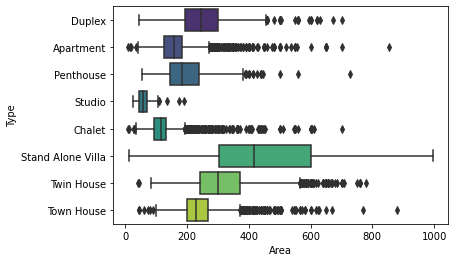

In [19]:
sns.boxplot(y='Type', x='Area', data=df, palette='viridis')

In [20]:
duplex_out =df[(df['Type']== 'Duplex') & (df['Area']> 460)].index
duplex_out

Int64Index([  378,   520,  1060,  4130,  4578,  5557,  5566,  5708,  6133,
             6788,  7692,  7784,  7856,  8265,  8962,  9066,  9207,  9244,
             9407,  9688, 16478],
           dtype='int64')

In [21]:
Apartment_out = df[(df['Type']== 'Apartment') & (df['Area']> 450)].index
Apartment_out_2 = df[(df['Type']== 'Apartment') & (df['Area']< 60)].index
Penthouse_out = df[(df['Type']== 'Penthouse') & (df['Area']> 340)].index
Studio_out = df[(df['Type']== 'Studio') & (df['Area']> 110)].index
Standalone_Villa_out = df[(df['Type']== 'Stand Alone Villa') & (df['Area']> 950)].index
Twin_House_out = df[(df['Type']== 'Twin House') & (df['Area']> 600)].index
Town_House_out2 = df[(df['Type']== 'Twin House') & (df['Area']< 140)].index
Town_House_out = df[(df['Type']== 'Town House') & (df['Area']> 510)].index
Chalet_out = df[(df['Type']== 'Chalet') & (df['Area']> 400)].index

In [22]:
area_outliers = [duplex_out ,Apartment_out , Apartment_out_2 ,Penthouse_out ,Studio_out ,Standalone_Villa_out , Twin_House_out ,
                Town_House_out ,Town_House_out2 , Chalet_out]

In [23]:
for i in area_outliers :
    df.drop(i ,inplace=True)

<AxesSubplot:xlabel='Area', ylabel='Type'>

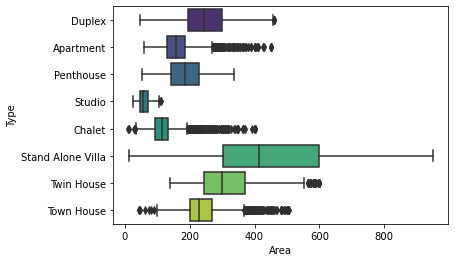

In [24]:
sns.boxplot(y='Type', x='Area', data=df, palette='viridis')

<AxesSubplot:xlabel='Price', ylabel='Type'>

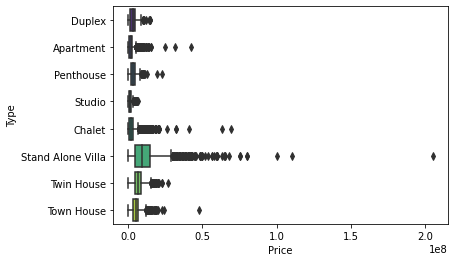

In [25]:
sns.boxplot(y='Type', x='Price', data=df, palette='viridis')

In [26]:
price_duplex =df[(df['Type']== 'Duplex') & (df['Price']> 7000000)].index
price_duplex

Int64Index([  287,  1072,  1392,  1400,  1860,  1905,  1941,  2837,  2866,
             3474,  3606,  3794,  4561,  4612,  4894,  5019,  5944,  6048,
             6302,  6307,  6309,  6315,  6329,  6549,  7366,  8527,  8716,
             8757,  9140,  9343,  9637, 13543, 13766, 13778, 16536, 17496],
           dtype='int64')

In [27]:
price_apartment = df[(df['Type']== 'Apartment') & (df['Price']> 8500000)].index
price_penthouse = df[(df['Type']== 'Penthouse') & (df['Price']> 6800000)].index
price_studio = df[(df['Type']== 'Studio') & (df['Price']> 2000000)].index
price_Chalet = df[(df['Type']== 'Chalet') & (df['Price']> 12000000)].index
price_twinhouse = df[(df['Type']== 'Twin House') & (df['Price']> 16000000)].index
price_stand_alone = df[(df['Type']== 'Stand Alone Villa') & (df['Price']> 27000000)].index
price_Town_house = df[(df['Type']== 'Town House') & (df['Price']> 13500000)].index

In [28]:
price_outliers = [price_duplex, price_apartment, price_penthouse, price_studio, price_Chalet, price_twinhouse , price_Town_house,price_stand_alone]

In [29]:
for i in price_outliers :
    df.drop(i ,inplace=True)

<AxesSubplot:xlabel='Price', ylabel='Type'>

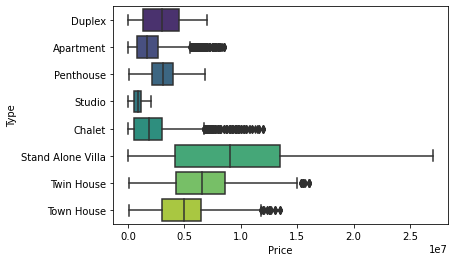

In [30]:
sns.boxplot(y='Type', x='Price', data=df, palette='viridis')

### * Fixing the Dtype by split the data frame useing (type) column .
### * going to replace values (10+: 11 , 'Highest'  , 'Ground') according to column type to int .
### * fill missing values  with Simple Imputer .
### * Detect and clear Outliers using detect_outliers library for each type .

In [31]:
df['Type'].value_counts()

Apartment            7982
Chalet               5945
Stand Alone Villa    4181
Town House           2811
Twin House           2049
Duplex                761
Penthouse             444
Studio                189
Name: Type, dtype: int64

In [32]:
df_Apartment = df[df['Type']=='Apartment']

In [33]:
df_Apartment.reset_index(inplace=True,drop= True)

In [34]:
df_Apartment

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City
0,Apartment,4000000.0,3.0,3.0,160.0,No,10+,Cash,Finished,Camp Caesar
1,Apartment,2250000.0,3.0,2.0,165.0,No,1,Cash,Finished,Smoha
2,Apartment,1900000.0,3.0,2.0,230.0,No,10,Cash,Finished,Nasr City
3,Apartment,5800000.0,2.0,3.0,160.0,No,Ground,Cash,Semi Finished,New Cairo - El Tagamoa
4,Apartment,1844900.0,4.0,3.0,222.0,No,1,Cash or Installment,Semi Finished,New Cairo - El Tagamoa
...,...,...,...,...,...,...,...,...,...,...
7977,Apartment,2200000.0,3,3,119.0,NaN,5,Cash,Finished,Rehab City
7978,Apartment,350000.0,3,3,205.0,NaN,2,Cash or Installment,Semi Finished,6th of October
7979,Apartment,350000.0,3,3,208.0,NaN,2,Cash or Installment,Semi Finished,6th of October
7980,Apartment,5000000.0,3,3,224.0,No,1,Cash,Finished,Rehab City


In [35]:
df_Apartment['Level'].value_counts()

2          2021
3          1515
1          1239
Ground     1195
4           668
5           446
6           193
10+         182
7           182
8           113
9            94
10           90
Highest      44
Name: Level, dtype: int64

In [1]:
df_Apartment['Level'] = df_Apartment['Level'].replace('10+', 11)
df_Apartment['Level'] = df_Apartment['Level'].replace('Ground', 0)
df_Apartment['Level'] = df_Apartment['Level'].replace('Highest', 12)

NameError: name 'df_Apartment' is not defined

In [37]:
df_Apartment['Payment_Option'].value_counts()

Cash                   3292
Cash or Installment    2846
Installment            1120
Name: Payment_Option, dtype: int64

In [38]:
df_Apartment['Delivery_Term'].value_counts()

Finished         3726
Semi Finished    2096
Not Finished      441
Core & Shell      359
Name: Delivery_Term, dtype: int64

In [39]:
df_Apartment.isnull().sum()

Type                 0
Price                0
Bedrooms             0
Bathrooms            0
Area                 0
Furnished         2308
Level                0
Payment_Option     724
Delivery_Term     1360
City                 0
dtype: int64

In [40]:
imputer = SimpleImputer(strategy='most_frequent')

In [41]:
df_Apartment[['Delivery_Term','Furnished','Payment_Option']] = imputer.fit_transform(df_Apartment[['Delivery_Term','Furnished','Payment_Option']])

In [42]:
df_Apartment.isnull().sum()

Type              0
Price             0
Bedrooms          0
Bathrooms         0
Area              0
Furnished         0
Level             0
Payment_Option    0
Delivery_Term     0
City              0
dtype: int64

In [43]:
df_Apartment['Level'] = df_Apartment['Level'].astype(float)
df_Apartment['Bathrooms'] = df_Apartment['Bathrooms'].astype(float)
df_Apartment['Bedrooms'] = df_Apartment['Bedrooms'].astype(float)

In [44]:
outliers=detect_outliers(data= df_Apartment ,n=0 , features=['Price','Area'])

In [45]:
df_Apartment=df_Apartment.drop(outliers,axis=0)
df_Apartment

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City
0,Apartment,4000000.0,3.0,3.0,160.0,No,11.0,Cash,Finished,Camp Caesar
1,Apartment,2250000.0,3.0,2.0,165.0,No,1.0,Cash,Finished,Smoha
2,Apartment,1900000.0,3.0,2.0,230.0,No,10.0,Cash,Finished,Nasr City
4,Apartment,1844900.0,4.0,3.0,222.0,No,1.0,Cash or Installment,Semi Finished,New Cairo - El Tagamoa
5,Apartment,1650000.0,2.0,2.0,144.0,No,1.0,Cash,Finished,Sheikh Zayed
...,...,...,...,...,...,...,...,...,...,...
7977,Apartment,2200000.0,3.0,3.0,119.0,No,5.0,Cash,Finished,Rehab City
7978,Apartment,350000.0,3.0,3.0,205.0,No,2.0,Cash or Installment,Semi Finished,6th of October
7979,Apartment,350000.0,3.0,3.0,208.0,No,2.0,Cash or Installment,Semi Finished,6th of October
7980,Apartment,5000000.0,3.0,3.0,224.0,No,1.0,Cash,Finished,Rehab City


In [46]:
df_Apartment.describe()

,Price,Bedrooms,Bathrooms,Area,Level
count,7.594000e+03,7594.000000,7594.000000,7594.000000,7594.000000
mean,1.784519e+06,2.771925,2.126547,154.583066,2.787332
std,1.211494e+06,0.559036,0.730818,42.141700,2.484657
min,3.000000e+04,1.000000,1.000000,60.000000,0.000000
25%,7.992500e+05,2.000000,2.000000,125.000000,1.000000
50%,1.600000e+06,3.000000,2.000000,155.000000,2.000000
75%,2.529202e+06,3.000000,3.000000,180.000000,4.000000
max,5.505000e+06,6.000000,5.000000,272.000000,12.000000


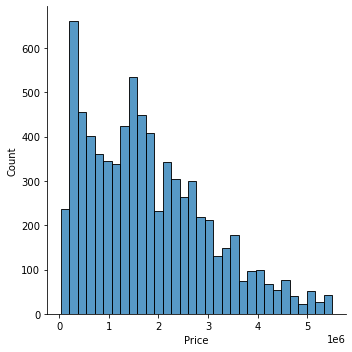

In [47]:
sns.displot(x='Price' , data=df_Apartment )

In [48]:
df_Apartment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7594 entries, 0 to 7981
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            7594 non-null   object 
 1   Price           7594 non-null   float64
 2   Bedrooms        7594 non-null   float64
 3   Bathrooms       7594 non-null   float64
 4   Area            7594 non-null   float64
 5   Furnished       7594 non-null   object 
 6   Level           7594 non-null   float64
 7   Payment_Option  7594 non-null   object 
 8   Delivery_Term   7594 non-null   object 
 9   City            7594 non-null   object 
dtypes: float64(5), object(5)
memory usage: 910.6+ KB


In [49]:
df_Chalet = df[df['Type']=='Chalet']
df_Chalet.reset_index(inplace=True,drop= True)

In [50]:
df_Chalet.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City
0,Chalet,1700000.0,2.0,2.0,95.0,No,1,Installment,Finished,Ain Sukhna
1,Chalet,750000.0,1.0,1.0,48.0,Yes,Ground,Cash,Finished,Marsa Matrouh
2,Chalet,110000.0,2.0,1.0,58.0,NaN,NaN,Cash or Installment,Semi Finished,Alamein
3,Chalet,2800000.0,2.0,2.0,115.0,NaN,NaN,Cash or Installment,Finished,North Coast
4,Chalet,967000.0,2.0,2.0,121.0,NaN,1,Installment,Finished,North Coast


In [51]:
df_Chalet['Level'].value_counts()

1          1896
Ground     1706
2          1172
3           203
4            67
10+          49
Highest      38
7            16
5            16
8             9
6             6
9             4
10            2
Name: Level, dtype: int64

In [52]:
df_Chalet['Level'] = df_Chalet['Level'].replace('10+', 11)
df_Chalet['Level'] = df_Chalet['Level'].replace('Ground', 0)
df_Chalet['Level'] = df_Chalet['Level'].replace('Highest', 12)

In [53]:
df_Chalet.isnull().sum()

Type                 0
Price                0
Bedrooms             0
Bathrooms            0
Area                 0
Furnished         1992
Level              761
Payment_Option     707
Delivery_Term      822
City                 0
dtype: int64

In [54]:
df_Chalet[['Delivery_Term','Furnished','Payment_Option','Level']] = imputer.fit_transform(df_Chalet[['Delivery_Term','Furnished','Payment_Option','Level']])

In [55]:
df_Chalet['Bathrooms'] = df_Chalet['Bathrooms'].astype(float)
df_Chalet['Bedrooms'] = df_Chalet['Bedrooms'].astype(float)
df_Chalet['Level'] = df_Chalet['Level'].astype(float)

In [56]:
outliers=detect_outliers(data= df_Chalet ,n=0 , features=['Price','Area'])

In [57]:
df_Chalet=df_Chalet.drop(outliers,axis=0)
df_Chalet

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City
0,Chalet,1700000.0,2.0,2.0,95.0,No,1.0,Installment,Finished,Ain Sukhna
1,Chalet,750000.0,1.0,1.0,48.0,Yes,0.0,Cash,Finished,Marsa Matrouh
2,Chalet,110000.0,2.0,1.0,58.0,No,1.0,Cash or Installment,Semi Finished,Alamein
3,Chalet,2800000.0,2.0,2.0,115.0,No,1.0,Cash or Installment,Finished,North Coast
4,Chalet,967000.0,2.0,2.0,121.0,No,1.0,Installment,Finished,North Coast
...,...,...,...,...,...,...,...,...,...,...
5940,Chalet,2600000.0,3.0,2.0,120.0,No,1.0,Cash or Installment,Finished,North Coast
5941,Chalet,2100000.0,2.0,2.0,100.0,No,1.0,Cash or Installment,Finished,North Coast
5942,Chalet,430000.0,1.0,2.0,58.0,Yes,1.0,Cash,Finished,Sharm al-Sheikh
5943,Chalet,2800000.0,3.0,2.0,113.0,No,1.0,Cash,Semi Finished,North Coast


In [58]:
df_Chalet.describe()

,Price,Bedrooms,Bathrooms,Area,Level
count,5.521000e+03,5521.000000,5521.000000,5521.000000,5521.000000
mean,1.902338e+06,2.305198,1.802391,109.842021,1.199058
std,1.486883e+06,0.681636,0.581323,27.853309,1.523026
min,3.300000e+04,1.000000,1.000000,35.000000,0.000000
25%,4.800000e+05,2.000000,1.000000,92.000000,0.000000
50%,1.760000e+06,2.000000,2.000000,110.000000,1.000000
75%,2.869000e+06,3.000000,2.000000,125.000000,2.000000
max,6.700000e+06,5.000000,5.000000,187.000000,12.000000


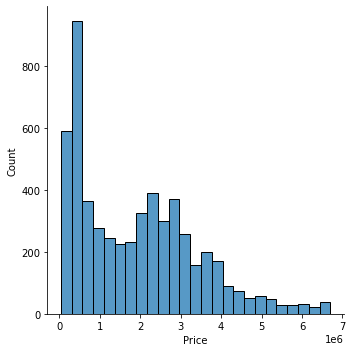

In [59]:
sns.displot(x='Price' , data=df_Chalet )

In [60]:
df_Chalet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5521 entries, 0 to 5944
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            5521 non-null   object 
 1   Price           5521 non-null   float64
 2   Bedrooms        5521 non-null   float64
 3   Bathrooms       5521 non-null   float64
 4   Area            5521 non-null   float64
 5   Furnished       5521 non-null   object 
 6   Level           5521 non-null   float64
 7   Payment_Option  5521 non-null   object 
 8   Delivery_Term   5521 non-null   object 
 9   City            5521 non-null   object 
dtypes: float64(5), object(5)
memory usage: 603.5+ KB


In [61]:
df_villa = df[df['Type']=='Stand Alone Villa']
df_villa.reset_index(inplace=True,drop= True)

In [62]:
df_villa.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City
0,Stand Alone Villa,1000000.0,4.0,3.0,225.0,No,2,Cash or Installment,Finished,Agami
1,Stand Alone Villa,26500000.0,6.0,5.0,560.0,Yes,NaN,Cash,Finished,North Coast
2,Stand Alone Villa,23500000.0,4.0,4.0,498.0,NaN,NaN,Cash,Finished,Marsa Matrouh
3,Stand Alone Villa,1450000.0,3.0,2.0,150.0,No,NaN,Cash,NaN,Ain Sukhna
4,Stand Alone Villa,14400000.0,5.0,5.0,321.0,NaN,NaN,Cash,Finished,North Coast


In [63]:
df_villa.describe()

,Price,Area
count,4.181000e+03,4181.000000
mean,9.548341e+06,451.979766
std,6.507254e+06,192.689209
min,3.600000e+04,33.000000
25%,4.200000e+06,300.000000
50%,9.000000e+06,400.000000
75%,1.350000e+07,600.000000
max,2.700000e+07,950.000000


In [64]:
df_villa['Level'].value_counts()

Ground     290
2           21
1           10
3            3
Highest      1
Name: Level, dtype: int64

In [65]:
df_villa['Level'] = df_villa['Level'].replace('Ground', 0)
df_villa['Level'] = df_villa['Level'].replace('Highest', 3)

In [66]:
df_villa.isnull().sum()

Type                 0
Price                0
Bedrooms             0
Bathrooms            0
Area                 0
Furnished         1293
Level             3856
Payment_Option     536
Delivery_Term      872
City                 0
dtype: int64

In [67]:
df_villa[['Delivery_Term','Furnished','Payment_Option','Level']] = imputer.fit_transform(df_villa[['Delivery_Term','Furnished','Payment_Option','Level']])

In [68]:
df_villa['Level'] = df_villa['Level'].astype(float)
df_villa['Bathrooms'] = df_villa['Bathrooms'].astype(float)
df_villa['Bedrooms'] = df_villa['Bedrooms'].astype(float)

In [69]:
outliers=detect_outliers(data= df_villa ,n=0 , features=['Price','Area'])

In [70]:
df_villa=df_villa.drop(outliers,axis=0)
df_villa

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City
0,Stand Alone Villa,1000000.0,4.0,3.0,225.0,No,2.0,Cash or Installment,Finished,Agami
1,Stand Alone Villa,26500000.0,6.0,5.0,560.0,Yes,0.0,Cash,Finished,North Coast
2,Stand Alone Villa,23500000.0,4.0,4.0,498.0,No,0.0,Cash,Finished,Marsa Matrouh
3,Stand Alone Villa,1450000.0,3.0,2.0,150.0,No,0.0,Cash,Finished,Ain Sukhna
4,Stand Alone Villa,14400000.0,5.0,5.0,321.0,No,0.0,Cash,Finished,North Coast
...,...,...,...,...,...,...,...,...,...,...
4176,Stand Alone Villa,5500000.0,5.0,4.0,364.0,No,0.0,Cash or Installment,Semi Finished,North Coast
4177,Stand Alone Villa,11950000.0,4.0,6.0,392.0,No,0.0,Installment,Finished,Moharam Bik
4178,Stand Alone Villa,16500000.0,4.0,4.0,620.0,No,0.0,Cash,Semi Finished,New Cairo - El Tagamoa
4179,Stand Alone Villa,16000000.0,5.0,5.0,530.0,No,0.0,Cash,Finished,New Cairo - El Tagamoa


In [71]:
df_villa.describe()

,Price,Bedrooms,Bathrooms,Area,Level
count,4.181000e+03,4181.000000,4181.000000,4181.000000,4181.000000
mean,9.548341e+06,4.522602,4.238699,451.979766,0.015307
std,6.507254e+06,1.212289,1.289985,192.689209,0.175688
min,3.600000e+04,1.000000,1.000000,33.000000,0.000000
25%,4.200000e+06,4.000000,3.000000,300.000000,0.000000
50%,9.000000e+06,4.000000,4.000000,400.000000,0.000000
75%,1.350000e+07,5.000000,5.000000,600.000000,0.000000
max,2.700000e+07,10.000000,10.000000,950.000000,3.000000


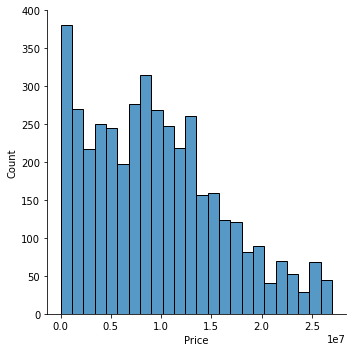

In [72]:
sns.displot(x='Price' , data=df_villa )

In [73]:
df_villa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4181 entries, 0 to 4180
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            4181 non-null   object 
 1   Price           4181 non-null   float64
 2   Bedrooms        4181 non-null   float64
 3   Bathrooms       4181 non-null   float64
 4   Area            4181 non-null   float64
 5   Furnished       4181 non-null   object 
 6   Level           4181 non-null   float64
 7   Payment_Option  4181 non-null   object 
 8   Delivery_Term   4181 non-null   object 
 9   City            4181 non-null   object 
dtypes: float64(5), object(5)
memory usage: 488.3+ KB


In [74]:
df_Town_House = df[df['Type']=='Town House']
df_Town_House.reset_index(inplace=True,drop= True)

In [75]:
df_Town_House.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City
0,Town House,3150000.0,4.0,3.0,265.0,No,1,Cash or Installment,Semi Finished,New Mansoura
1,Town House,1200000.0,3.0,3.0,155.0,No,Ground,Cash or Installment,Semi Finished,North Coast
2,Town House,374000.0,3.0,3.0,248.0,NaN,2,NaN,NaN,North Coast
3,Town House,5500000.0,4.0,4.0,169.0,No,Ground,Installment,Finished,North Coast
4,Town House,470000.0,3.0,2.0,150.0,No,Ground,Cash or Installment,NaN,North Coast


In [76]:
df_Town_House.describe()

,Price,Area
count,2.811000e+03,2811.000000
mean,4.741057e+06,238.704020
std,2.784841e+06,65.208441
min,1.000000e+05,44.000000
25%,3.000000e+06,199.000000
50%,4.999000e+06,227.000000
75%,6.500000e+06,266.000000
max,1.350000e+07,505.000000


In [77]:
df_Town_House['Level'].value_counts()

Ground    324
1          25
2          10
3           2
4           1
Name: Level, dtype: int64

In [78]:
df_Town_House['Level'] = df_Town_House['Level'].replace('Ground', 1)

In [79]:
df_Town_House.isnull().sum()

Type                 0
Price                0
Bedrooms             0
Bathrooms            0
Area                 0
Furnished          912
Level             2449
Payment_Option     356
Delivery_Term      661
City                 0
dtype: int64

In [80]:
df_Town_House[['Delivery_Term','Furnished','Payment_Option','Level']] = imputer.fit_transform(df_Town_House[['Delivery_Term','Furnished','Payment_Option','Level']])

In [81]:
df_Town_House['Level'] = df_Town_House['Level'].astype(float)
df_Town_House['Bathrooms'] = df_Town_House['Bathrooms'].astype(float)
df_Town_House['Bedrooms'] = df_Town_House['Bedrooms'].astype(float)

In [82]:
outliers=detect_outliers(data= df_Town_House ,n=0 , features=['Price','Area'])

In [83]:
df_Town_House=df_Town_House.drop(outliers,axis=0)
df_Town_House

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City
0,Town House,3150000.0,4.0,3.0,265.0,No,1.0,Cash or Installment,Semi Finished,New Mansoura
1,Town House,1200000.0,3.0,3.0,155.0,No,1.0,Cash or Installment,Semi Finished,North Coast
2,Town House,374000.0,3.0,3.0,248.0,No,2.0,Cash or Installment,Finished,North Coast
3,Town House,5500000.0,4.0,4.0,169.0,No,1.0,Installment,Finished,North Coast
4,Town House,470000.0,3.0,2.0,150.0,No,1.0,Cash or Installment,Finished,North Coast
...,...,...,...,...,...,...,...,...,...,...
2806,Town House,4290000.0,4.0,4.0,220.0,Yes,1.0,Cash or Installment,Finished,New Cairo - El Tagamoa
2807,Town House,5000000.0,3.0,2.0,200.0,No,1.0,Cash or Installment,Finished,New Cairo - El Tagamoa
2808,Town House,4000000.0,4.0,4.0,350.0,No,1.0,Cash or Installment,Semi Finished,New Capital City
2809,Town House,890000.0,3.0,2.0,240.0,No,1.0,Cash or Installment,Finished,North Coast


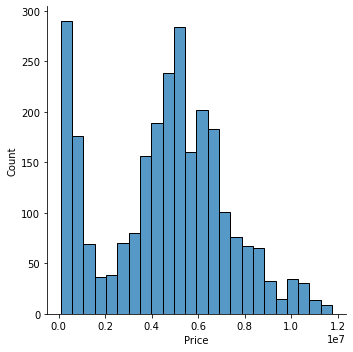

In [84]:
sns.displot(x='Price' , data=df_Town_House )

In [85]:
df_Town_House.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2616 entries, 0 to 2810
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            2616 non-null   object 
 1   Price           2616 non-null   float64
 2   Bedrooms        2616 non-null   float64
 3   Bathrooms       2616 non-null   float64
 4   Area            2616 non-null   float64
 5   Furnished       2616 non-null   object 
 6   Level           2616 non-null   float64
 7   Payment_Option  2616 non-null   object 
 8   Delivery_Term   2616 non-null   object 
 9   City            2616 non-null   object 
dtypes: float64(5), object(5)
memory usage: 289.4+ KB


In [86]:
df_Twin_House = df[df['Type']=='Twin House']
df_Twin_House.reset_index(inplace=True,drop= True)

In [87]:
df_Twin_House.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City
0,Twin House,4250000.0,3.0,3.0,180.0,No,2,Cash,Finished,Ain Sukhna
1,Twin House,8830350.0,4.0,4.0,220.0,NaN,NaN,Installment,Finished,North Coast
2,Twin House,3357178.0,3.0,3.0,311.0,No,Ground,Cash or Installment,Finished,Ras Sedr
3,Twin House,6500000.0,4.0,4.0,220.0,NaN,Ground,Cash,Finished,North Coast
4,Twin House,14350000.0,3.0,3.0,263.0,No,NaN,Cash,Finished,North Coast


In [88]:
df_Twin_House.describe()

,Price,Area
count,2.049000e+03,2049.000000
mean,6.654527e+06,306.027789
std,3.632041e+06,94.078047
min,5.000000e+04,140.000000
25%,4.250000e+06,242.000000
50%,6.600000e+06,297.000000
75%,8.600000e+06,365.000000
max,1.600000e+07,600.000000


In [89]:
df_Twin_House['Level'].value_counts()

Ground    259
2           9
1           9
4           1
Name: Level, dtype: int64

In [90]:
df_Twin_House['Level'] = df_Twin_House['Level'].replace('Ground', 0)

In [91]:
df_Twin_House.isnull().sum()

Type                 0
Price                0
Bedrooms             0
Bathrooms            0
Area                 0
Furnished          611
Level             1771
Payment_Option     261
Delivery_Term      365
City                 0
dtype: int64

In [92]:
df_Twin_House[['Delivery_Term','Furnished','Payment_Option','Level']] = imputer.fit_transform(df_Twin_House[['Delivery_Term','Furnished','Payment_Option','Level']])

In [93]:
df_Twin_House['Level'] = df_Twin_House['Level'].astype(float)
df_Twin_House['Bathrooms'] = df_Twin_House['Bathrooms'].astype(float)
df_Twin_House['Bedrooms'] = df_Twin_House['Bedrooms'].astype(float)

In [94]:
outliers=detect_outliers(data= df_Twin_House ,n=0 , features=['Price','Area'])

In [95]:
df_Twin_House=df_Twin_House.drop(outliers,axis=0)
df_Twin_House

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City
0,Twin House,4250000.0,3.0,3.0,180.0,No,2.0,Cash,Finished,Ain Sukhna
1,Twin House,8830350.0,4.0,4.0,220.0,No,0.0,Installment,Finished,North Coast
2,Twin House,3357178.0,3.0,3.0,311.0,No,0.0,Cash or Installment,Finished,Ras Sedr
3,Twin House,6500000.0,4.0,4.0,220.0,No,0.0,Cash,Finished,North Coast
4,Twin House,14350000.0,3.0,3.0,263.0,No,0.0,Cash,Finished,North Coast
...,...,...,...,...,...,...,...,...,...,...
2044,Twin House,5150000.0,4.0,4.0,350.0,No,0.0,Cash or Installment,Semi Finished,New Cairo - El Tagamoa
2045,Twin House,500000.0,3.0,2.0,174.0,No,0.0,Cash or Installment,Finished,New Cairo - El Tagamoa
2046,Twin House,6276000.0,3.0,3.0,200.0,No,0.0,Installment,Core & Shell,6th of October
2047,Twin House,12284000.0,4.0,4.0,337.0,No,0.0,Cash or Installment,Not Finished,Sheikh Zayed


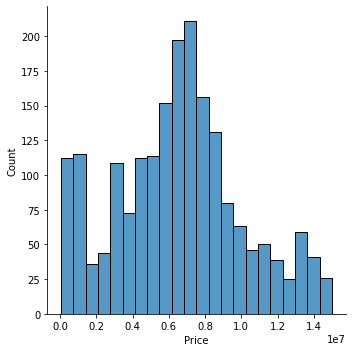

In [96]:
sns.displot(x='Price' , data=df_Twin_House )

In [97]:
df_Twin_House.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 2048
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            1991 non-null   object 
 1   Price           1991 non-null   float64
 2   Bedrooms        1991 non-null   float64
 3   Bathrooms       1991 non-null   float64
 4   Area            1991 non-null   float64
 5   Furnished       1991 non-null   object 
 6   Level           1991 non-null   float64
 7   Payment_Option  1991 non-null   object 
 8   Delivery_Term   1991 non-null   object 
 9   City            1991 non-null   object 
dtypes: float64(5), object(5)
memory usage: 235.6+ KB


In [98]:
df_Duplex = df[df['Type']=='Duplex']
df_Duplex.reset_index(inplace=True,drop= True)

In [99]:
df_Duplex.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City
0,Duplex,4000000.0,3.0,3.0,400.0,No,7,Cash,Finished,Nasr City
1,Duplex,3900000.0,5.0,5.0,290.0,No,Highest,NaN,Finished,New Cairo - El Tagamoa
2,Duplex,1100000.0,3.0,2.0,165.0,NaN,Ground,Installment,Semi Finished,New Damietta
3,Duplex,6095000.0,4.0,5.0,246.0,No,Ground,NaN,Finished,Sheikh Zayed
4,Duplex,590000.0,4.0,2.0,238.0,No,Ground,Cash or Installment,Not Finished,New Cairo - El Tagamoa


In [100]:
df_Duplex.describe()

,Price,Area
count,7.610000e+02,761.000000
mean,3.019711e+06,244.848883
std,1.900973e+06,75.040126
min,4.000000e+04,45.000000
25%,1.300000e+06,192.000000
50%,3.000000e+06,240.000000
75%,4.500000e+06,295.000000
max,7.000000e+06,460.000000


In [101]:
df_Duplex['Level'].value_counts()

Ground     416
2           95
3           77
1           61
5           23
Highest     20
4           19
6           10
10+          9
7            5
10           2
9            2
8            1
Name: Level, dtype: int64

In [102]:
df_Duplex['Level'] = df_Duplex['Level'].replace('10+', 11)
df_Duplex['Level'] = df_Duplex['Level'].replace('Ground', 1)
df_Duplex['Level'] = df_Duplex['Level'].replace('Highest', 12)

In [103]:
df_Duplex.isnull().sum()

Type                0
Price               0
Bedrooms            0
Bathrooms           0
Area                0
Furnished         232
Level              21
Payment_Option     79
Delivery_Term     109
City                0
dtype: int64

In [104]:
df_Duplex[['Delivery_Term','Furnished','Payment_Option','Level']] = imputer.fit_transform(df_Duplex[['Delivery_Term','Furnished','Payment_Option','Level']])

In [105]:
df_Duplex['Level'] = df_Duplex['Level'].astype(float)
df_Duplex['Bathrooms'] = df_Duplex['Bathrooms'].astype(float)
df_Duplex['Bedrooms'] = df_Duplex['Bedrooms'].astype(float)

In [106]:
outliers=detect_outliers(data= df_Duplex ,n=0 , features=['Price','Area'])

In [107]:
df_Duplex=df_Duplex.drop(outliers,axis=0)
df_Duplex

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City
0,Duplex,4000000.0,3.0,3.0,400.0,No,7.0,Cash,Finished,Nasr City
1,Duplex,3900000.0,5.0,5.0,290.0,No,12.0,Cash or Installment,Finished,New Cairo - El Tagamoa
2,Duplex,1100000.0,3.0,2.0,165.0,No,1.0,Installment,Semi Finished,New Damietta
3,Duplex,6095000.0,4.0,5.0,246.0,No,1.0,Cash or Installment,Finished,Sheikh Zayed
4,Duplex,590000.0,4.0,2.0,238.0,No,1.0,Cash or Installment,Not Finished,New Cairo - El Tagamoa
...,...,...,...,...,...,...,...,...,...,...
756,Duplex,525000.0,3.0,2.0,178.0,No,1.0,Cash or Installment,Finished,Sheikh Zayed
757,Duplex,4800000.0,3.0,2.0,192.0,No,2.0,Cash or Installment,Finished,North Coast
758,Duplex,410000.0,3.0,2.0,132.0,Yes,1.0,Cash or Installment,Finished,North Coast
759,Duplex,440000.0,2.0,2.0,100.0,Yes,1.0,Cash,Finished,Ras Sedr


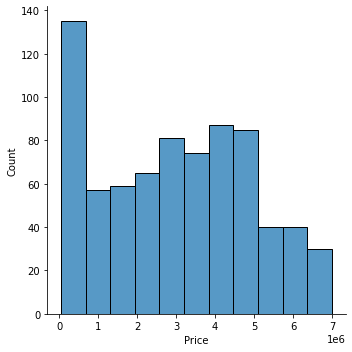

In [108]:
sns.displot(x='Price' , data=df_Duplex )

In [109]:
df_Duplex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753 entries, 0 to 760
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            753 non-null    object 
 1   Price           753 non-null    float64
 2   Bedrooms        753 non-null    float64
 3   Bathrooms       753 non-null    float64
 4   Area            753 non-null    float64
 5   Furnished       753 non-null    object 
 6   Level           753 non-null    float64
 7   Payment_Option  753 non-null    object 
 8   Delivery_Term   753 non-null    object 
 9   City            753 non-null    object 
dtypes: float64(5), object(5)
memory usage: 80.9+ KB


In [110]:
df_Penthouse = df[df['Type']=='Penthouse']
df_Penthouse.reset_index(inplace=True,drop= True)

In [111]:
df_Penthouse.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City
0,Penthouse,975000.0,4.0,2.0,229.0,No,4,Cash,Semi Finished,Mokattam
1,Penthouse,3700000.0,4.0,3.0,263.0,No,3,Cash or Installment,Finished,Sheikh Zayed
2,Penthouse,4128000.0,3.0,3.0,301.0,NaN,3,NaN,NaN,Sheikh Zayed
3,Penthouse,3300000.0,3.0,3.0,167.0,No,2,Cash or Installment,Finished,New Cairo - El Tagamoa
4,Penthouse,2350000.0,3.0,3.0,175.0,No,3,Cash,Semi Finished,New Cairo - El Tagamoa


In [112]:
df_Penthouse.describe()

,Price,Area
count,4.440000e+02,444.000000
mean,3.104844e+06,183.880631
std,1.647642e+06,60.774965
min,1.250000e+05,53.000000
25%,2.100000e+06,139.250000
50%,3.100000e+06,175.000000
75%,4.000000e+06,223.000000
max,6.800000e+06,336.000000


In [113]:
df_Penthouse['Level'].value_counts()

3          124
2          102
4           74
Highest     58
5           31
1           24
Ground      10
10+          2
7            1
10           1
Name: Level, dtype: int64

In [114]:
df_Penthouse['Level'] = df_Penthouse['Level'].replace('10+', 11)
df_Penthouse['Level'] = df_Penthouse['Level'].replace('Ground', 1)
df_Penthouse['Level'] = df_Penthouse['Level'].replace('Highest', 11)

In [115]:
df_Penthouse.isnull().sum()

Type                0
Price               0
Bedrooms            0
Bathrooms           0
Area                0
Furnished         136
Level              17
Payment_Option     45
Delivery_Term      52
City                0
dtype: int64

In [116]:
df_Penthouse[['Delivery_Term','Furnished','Payment_Option','Level']] = imputer.fit_transform(df_Penthouse[['Delivery_Term','Furnished','Payment_Option','Level']])

In [117]:
df_Penthouse['Level'] = df_Penthouse['Level'].astype(float)
df_Penthouse['Bathrooms'] = df_Penthouse['Bathrooms'].astype(float)
df_Penthouse['Bedrooms'] = df_Penthouse['Bedrooms'].astype(float)

In [118]:
outliers=detect_outliers(data= df_Penthouse ,n=0 , features=['Price','Area'])

In [119]:
df_Penthouse=df_Penthouse.drop(outliers,axis=0)
df_Penthouse

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City
0,Penthouse,975000.0,4.0,2.0,229.0,No,4.0,Cash,Semi Finished,Mokattam
1,Penthouse,3700000.0,4.0,3.0,263.0,No,3.0,Cash or Installment,Finished,Sheikh Zayed
2,Penthouse,4128000.0,3.0,3.0,301.0,No,3.0,Cash or Installment,Finished,Sheikh Zayed
3,Penthouse,3300000.0,3.0,3.0,167.0,No,2.0,Cash or Installment,Finished,New Cairo - El Tagamoa
4,Penthouse,2350000.0,3.0,3.0,175.0,No,3.0,Cash,Semi Finished,New Cairo - El Tagamoa
...,...,...,...,...,...,...,...,...,...,...
439,Penthouse,2500000.0,3.0,2.0,135.0,No,3.0,Cash,Finished,Ain Sukhna
440,Penthouse,5250000.0,4.0,3.0,270.0,No,3.0,Cash or Installment,Finished,North Coast
441,Penthouse,1000000.0,2.0,1.0,128.0,No,3.0,Cash,Finished,Borg al-Arab
442,Penthouse,3000000.0,2.0,1.0,115.0,Yes,2.0,Cash,Finished,North Coast


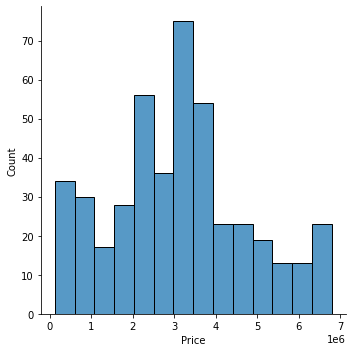

In [120]:
sns.displot(x='Price' , data=df_Penthouse )

In [121]:
df_Penthouse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444 entries, 0 to 443
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            444 non-null    object 
 1   Price           444 non-null    float64
 2   Bedrooms        444 non-null    float64
 3   Bathrooms       444 non-null    float64
 4   Area            444 non-null    float64
 5   Furnished       444 non-null    object 
 6   Level           444 non-null    float64
 7   Payment_Option  444 non-null    object 
 8   Delivery_Term   444 non-null    object 
 9   City            444 non-null    object 
dtypes: float64(5), object(5)
memory usage: 54.3+ KB


In [122]:
df_Studio = df[df['Type']=='Studio']
df_Studio.reset_index(inplace=True,drop= True)

In [123]:
df_Studio.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City
0,Studio,1003000.0,1.0,1.0,69.0,No,Ground,Cash or Installment,Not Finished,New Cairo - El Tagamoa
1,Studio,1250000.0,1.0,1.0,42.0,Yes,Ground,Cash,Finished,Madinaty
2,Studio,800000.0,1.0,1.0,34.0,NaN,Ground,Cash or Installment,Finished,6th of October
3,Studio,1003000.0,1.0,1.0,69.0,No,Ground,Cash or Installment,Core & Shell,New Cairo - El Tagamoa
4,Studio,500000.0,1.0,1.0,68.0,No,Ground,Cash,Finished,Madinaty


In [124]:
df_Studio.describe()

,Price,Area
count,1.890000e+02,189.000000
mean,9.077862e+05,56.650794
std,5.055673e+05,15.752229
min,4.500000e+04,25.000000
25%,5.500000e+05,45.000000
50%,8.500000e+05,54.000000
75%,1.200000e+06,67.000000
max,2.000000e+06,110.000000


In [125]:
df_Studio['Level'].value_counts()

Ground    55
2         46
1         44
3         20
4          6
5          2
10+        2
10         1
9          1
8          1
7          1
6          1
Name: Level, dtype: int64

In [126]:
df_Studio['Level'] = df_Studio['Level'].replace('10+', 11)
df_Studio['Level'] = df_Studio['Level'].replace('Ground', 1)

In [127]:
df_Studio.isnull().sum()

Type               0
Price              0
Bedrooms           0
Bathrooms          0
Area               0
Furnished         64
Level              9
Payment_Option    25
Delivery_Term     29
City               0
dtype: int64

In [128]:
df_Studio[['Delivery_Term','Furnished','Payment_Option','Level']] = imputer.fit_transform(df_Studio[['Delivery_Term','Furnished','Payment_Option','Level']])

In [129]:
df_Studio['Level'] = df_Studio['Level'].astype(float)
df_Studio['Bathrooms'] = df_Studio['Bathrooms'].astype(float)
df_Studio['Bedrooms'] = df_Studio['Bedrooms'].astype(float)

In [130]:
outliers=detect_outliers(data= df_Studio ,n=0 , features=['Price','Area'])

In [131]:
df_Studio=df_Studio.drop(outliers,axis=0)
df_Studio

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City
0,Studio,1003000.0,1.0,1.0,69.0,No,1.0,Cash or Installment,Not Finished,New Cairo - El Tagamoa
1,Studio,1250000.0,1.0,1.0,42.0,Yes,1.0,Cash,Finished,Madinaty
2,Studio,800000.0,1.0,1.0,34.0,No,1.0,Cash or Installment,Finished,6th of October
3,Studio,1003000.0,1.0,1.0,69.0,No,1.0,Cash or Installment,Core & Shell,New Cairo - El Tagamoa
4,Studio,500000.0,1.0,1.0,68.0,No,1.0,Cash,Finished,Madinaty
...,...,...,...,...,...,...,...,...,...,...
184,Studio,663000.0,1.0,1.0,27.0,No,2.0,Cash or Installment,Finished,Nasr City
185,Studio,1200000.0,1.0,1.0,50.0,No,1.0,Cash or Installment,Finished,Ain Sukhna
186,Studio,1139431.0,1.0,1.0,50.0,No,3.0,Installment,Finished,Hurghada
187,Studio,850000.0,1.0,1.0,40.0,No,3.0,Installment,Not Finished,Alamein


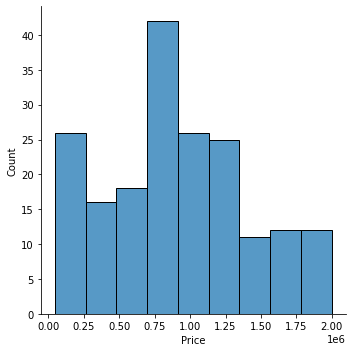

In [132]:
sns.displot(x='Price' , data=df_Studio )

In [133]:
df_Studio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 188
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            188 non-null    object 
 1   Price           188 non-null    float64
 2   Bedrooms        188 non-null    float64
 3   Bathrooms       188 non-null    float64
 4   Area            188 non-null    float64
 5   Furnished       188 non-null    object 
 6   Level           188 non-null    float64
 7   Payment_Option  188 non-null    object 
 8   Delivery_Term   188 non-null    object 
 9   City            188 non-null    object 
dtypes: float64(5), object(5)
memory usage: 20.2+ KB


## * concate the data frame again after fix the data types and filling the missing values .

In [134]:
new_df= pd.concat([df_Apartment,df_Chalet,df_Duplex,df_Penthouse, df_Studio, df_Town_House,df_Twin_House,df_villa],ignore_index=True)

In [135]:
new_df

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City
0,Apartment,4000000.0,3.0,3.0,160.0,No,11.0,Cash,Finished,Camp Caesar
1,Apartment,2250000.0,3.0,2.0,165.0,No,1.0,Cash,Finished,Smoha
2,Apartment,1900000.0,3.0,2.0,230.0,No,10.0,Cash,Finished,Nasr City
3,Apartment,1844900.0,4.0,3.0,222.0,No,1.0,Cash or Installment,Semi Finished,New Cairo - El Tagamoa
4,Apartment,1650000.0,2.0,2.0,144.0,No,1.0,Cash,Finished,Sheikh Zayed
...,...,...,...,...,...,...,...,...,...,...
23283,Stand Alone Villa,5500000.0,5.0,4.0,364.0,No,0.0,Cash or Installment,Semi Finished,North Coast
23284,Stand Alone Villa,11950000.0,4.0,6.0,392.0,No,0.0,Installment,Finished,Moharam Bik
23285,Stand Alone Villa,16500000.0,4.0,4.0,620.0,No,0.0,Cash,Semi Finished,New Cairo - El Tagamoa
23286,Stand Alone Villa,16000000.0,5.0,5.0,530.0,No,0.0,Cash,Finished,New Cairo - El Tagamoa


In [136]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23288 entries, 0 to 23287
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            23288 non-null  object 
 1   Price           23288 non-null  float64
 2   Bedrooms        23288 non-null  float64
 3   Bathrooms       23288 non-null  float64
 4   Area            23288 non-null  float64
 5   Furnished       23288 non-null  object 
 6   Level           23288 non-null  float64
 7   Payment_Option  23288 non-null  object 
 8   Delivery_Term   23288 non-null  object 
 9   City            23288 non-null  object 
dtypes: float64(5), object(5)
memory usage: 1.8+ MB


## * deleting some raws that doest make sensce like 4 rooms in 100 miters .
## * not logic price combaire with Area .

In [137]:
new_df=new_df.drop(new_df[(new_df['Area']<=100)&(new_df['Bedrooms']>=4)].index)
new_df=new_df.drop(new_df[(new_df['Area']<=30)&(new_df['Type']!='Studio')].index)

In [138]:
new_df=new_df.drop(new_df[(new_df['Price']<=120000)&(new_df['Type']!='Studio')&(new_df['Type']!='Chalet')].index)

## * check for new duplicte 

In [139]:
new_df.duplicated().sum()

1418

In [140]:
new_df.drop_duplicates(inplace= True)

In [141]:
new_df.duplicated().sum()

0

## * reset the index .

In [142]:
new_df.reset_index(inplace=True,drop= True)

## Data analsasyis and Visualization (univarite ).

In [143]:
new_df["log_price"]= np.log(new_df['Price'])

<AxesSubplot:>

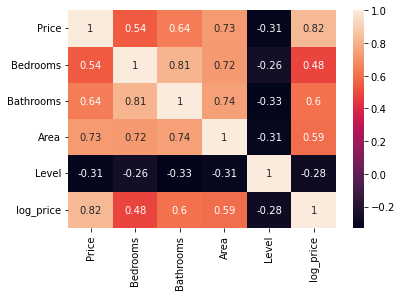

In [144]:
sns.heatmap(new_df.corr() , annot=True)

### * categorical columns Visualization .

In [145]:
cat_col = new_df.select_dtypes(include='object')

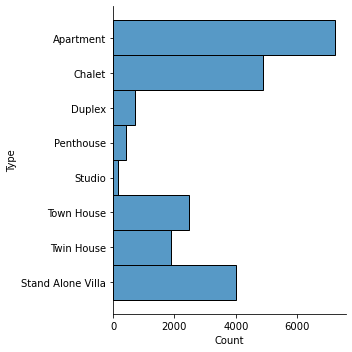

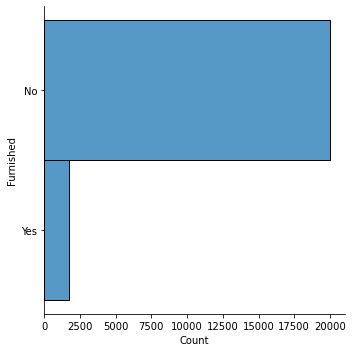

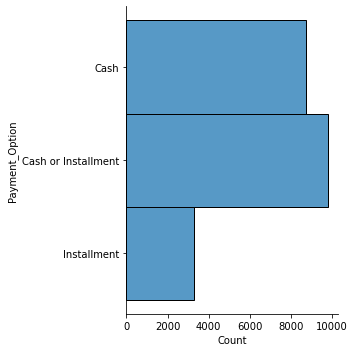

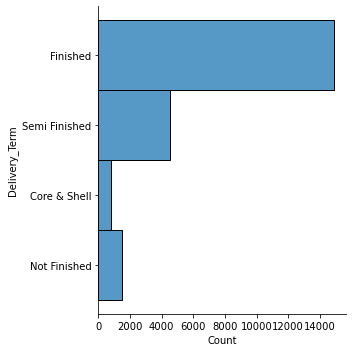

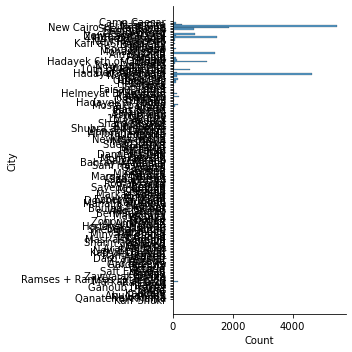

In [146]:
for col in cat_col :
    sns.displot(data= new_df , y= col)

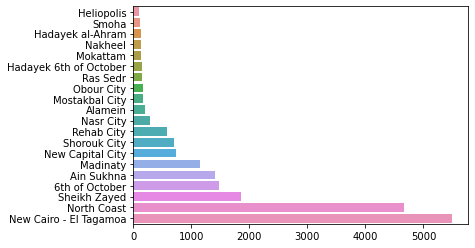

In [147]:
mp = new_df['City'].value_counts()[0:20].sort_values()
sns.barplot(y=mp.index,x=mp.values);

### * numerical columns Visualization .

In [148]:
new_df.describe()

,Price,Bedrooms,Bathrooms,Area,Level,log_price
count,2.179100e+04,21791.000000,21791.000000,21791.000000,21791.000000,21791.000000
mean,4.043871e+06,3.199899,2.744115,223.500066,1.491166,14.631970
std,4.460184e+06,1.144439,1.276669,153.843759,2.089376,1.165435
min,3.300000e+04,1.000000,1.000000,25.000000,0.000000,10.404263
25%,1.006625e+06,3.000000,2.000000,125.000000,0.000000,13.822114
50%,2.575000e+06,3.000000,3.000000,175.000000,1.000000,14.761360
75%,5.240000e+06,4.000000,3.000000,265.000000,2.000000,15.471832
max,2.700000e+07,10.000000,10.000000,950.000000,12.000000,17.111347


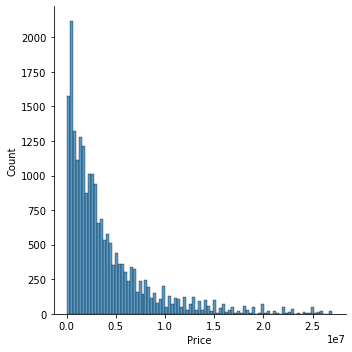

In [149]:
sns.displot(x='Price' , data=new_df )

<AxesSubplot:xlabel='Price'>

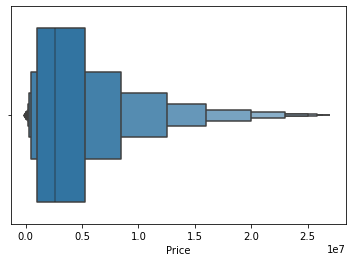

In [150]:
sns.boxenplot(x='Price' , data=new_df )

<AxesSubplot:xlabel='Area'>

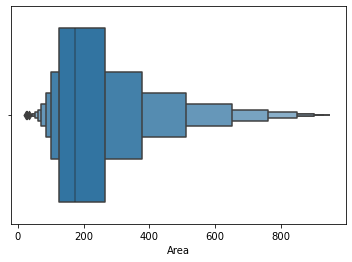

In [151]:
sns.boxenplot(x='Area' , data=new_df )

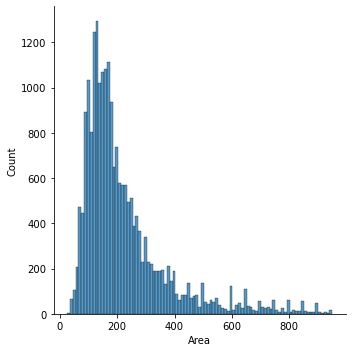

In [152]:
sns.displot(x='Area' , data=new_df )

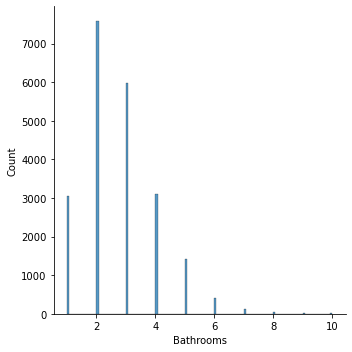

In [153]:
sns.displot(x='Bathrooms' , data=new_df )

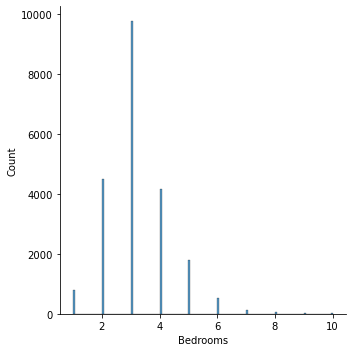

In [154]:
sns.displot(x='Bedrooms' , data=new_df )

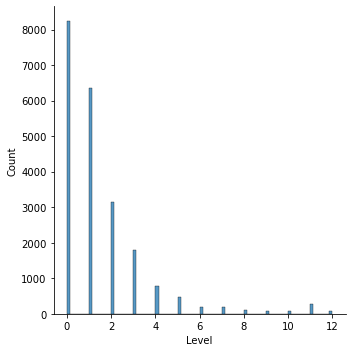

In [155]:
sns.displot(x='Level' , data=new_df )

### * Data analsasyis and Visualization (bivariate analysis) .

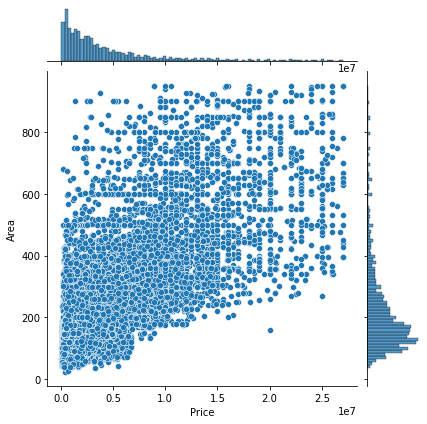

In [156]:
sns.jointplot( x='Price', y='Area', data=new_df)

<AxesSubplot:xlabel='Price', ylabel='Type'>

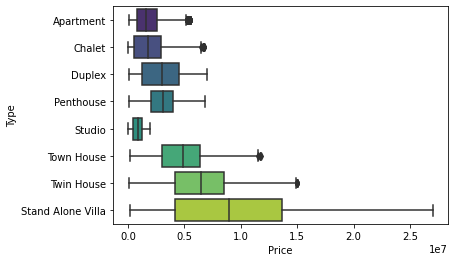

In [157]:
sns.boxplot(y='Type', x='Price', data=new_df, palette='viridis')

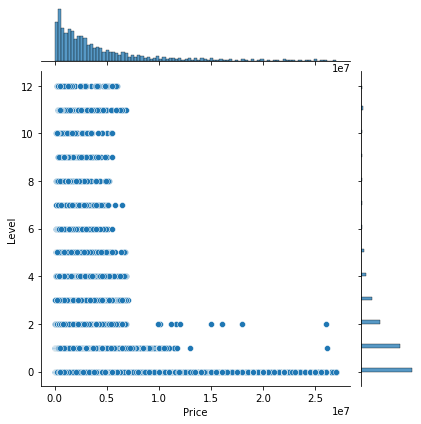

In [158]:
sns.jointplot(y='Level', x='Price', data=new_df, palette='viridis')

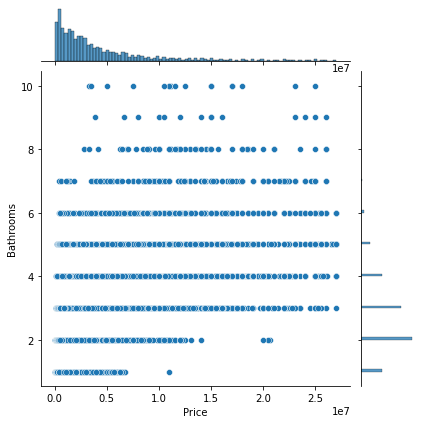

In [159]:
sns.jointplot(y='Bathrooms', x='Price', data=new_df, palette='viridis')

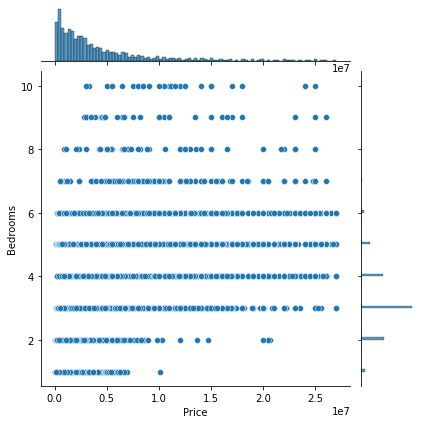

In [160]:
sns.jointplot(y='Bedrooms', x='Price', data=new_df, palette='viridis')

<AxesSubplot:xlabel='log_price', ylabel='Area'>

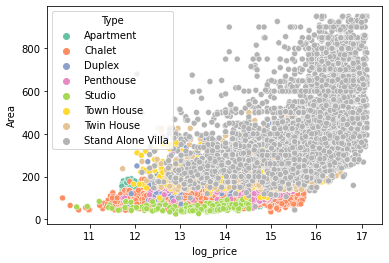

In [161]:
sns.scatterplot(data=new_df , x= 'log_price' , y='Area' , hue = 'Type', palette = "Set2")

<AxesSubplot:xlabel='Price', ylabel='Area'>

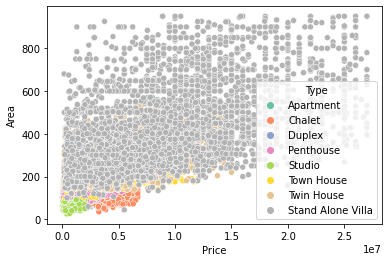

In [162]:
sns.scatterplot(data=new_df , x= 'Price' , y='Area' , hue = 'Type', palette = "Set2")

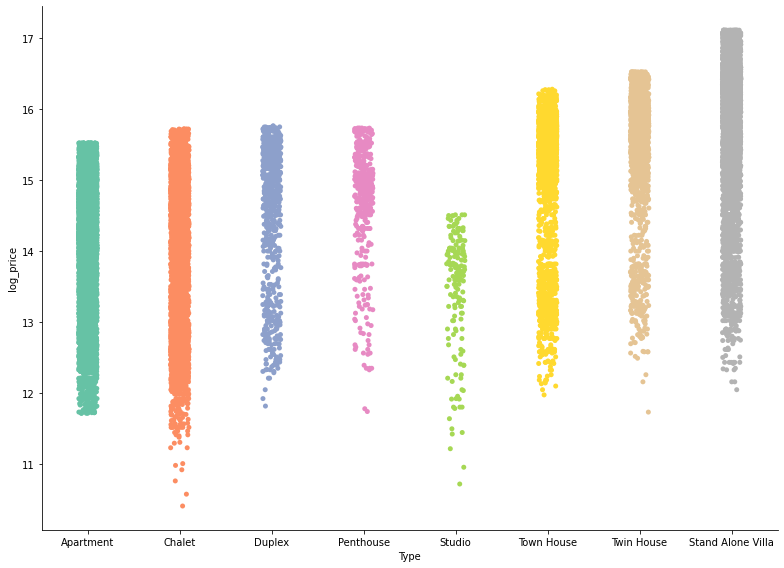

In [163]:
sns.catplot(x = "Type", y = "log_price", palette = "Set2", height=8, aspect=11/8, data = new_df)

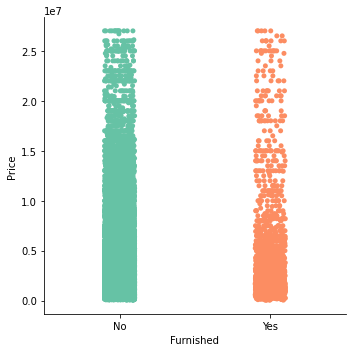

In [164]:
sns.catplot(x = "Furnished", y = "Price", palette = "Set2",data = new_df)

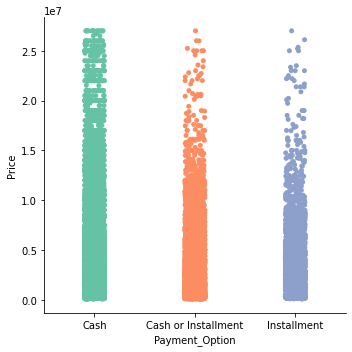

In [165]:
sns.catplot(x = "Payment_Option", y = "Price", palette = "Set2", data = new_df)

In [166]:
new_df.to_csv('New_data.csv')

In [167]:
new_df

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City,log_price
0,Apartment,4000000.0,3.0,3.0,160.0,No,11.0,Cash,Finished,Camp Caesar,15.201805
1,Apartment,2250000.0,3.0,2.0,165.0,No,1.0,Cash,Finished,Smoha,14.626441
2,Apartment,1900000.0,3.0,2.0,230.0,No,10.0,Cash,Finished,Nasr City,14.457364
3,Apartment,1844900.0,4.0,3.0,222.0,No,1.0,Cash or Installment,Semi Finished,New Cairo - El Tagamoa,14.427936
4,Apartment,1650000.0,2.0,2.0,144.0,No,1.0,Cash,Finished,Sheikh Zayed,14.316286
...,...,...,...,...,...,...,...,...,...,...,...
21786,Stand Alone Villa,5500000.0,5.0,4.0,364.0,No,0.0,Cash or Installment,Semi Finished,North Coast,15.520259
21787,Stand Alone Villa,11950000.0,4.0,6.0,392.0,No,0.0,Installment,Finished,Moharam Bik,16.296242
21788,Stand Alone Villa,16500000.0,4.0,4.0,620.0,No,0.0,Cash,Semi Finished,New Cairo - El Tagamoa,16.618871
21789,Stand Alone Villa,16000000.0,5.0,5.0,530.0,No,0.0,Cash,Finished,New Cairo - El Tagamoa,16.588099


                                             |                                             | [  0%]   00:00 ->…

Report analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



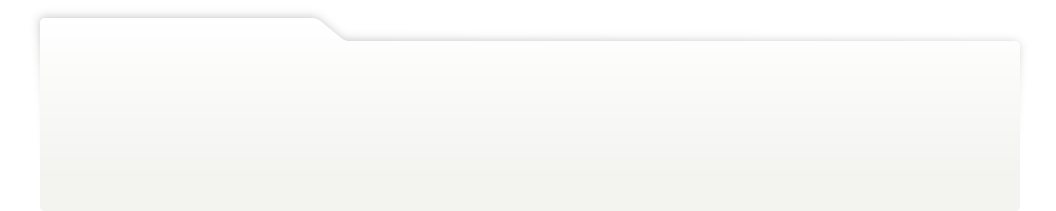
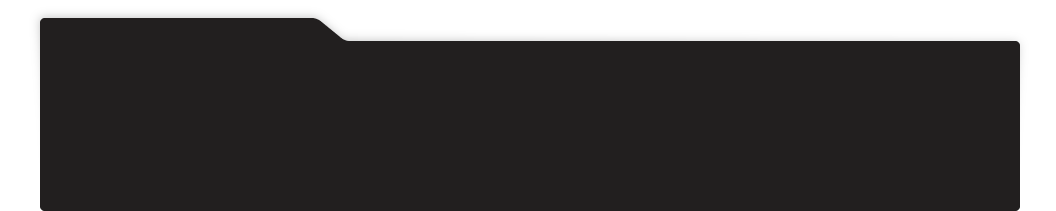
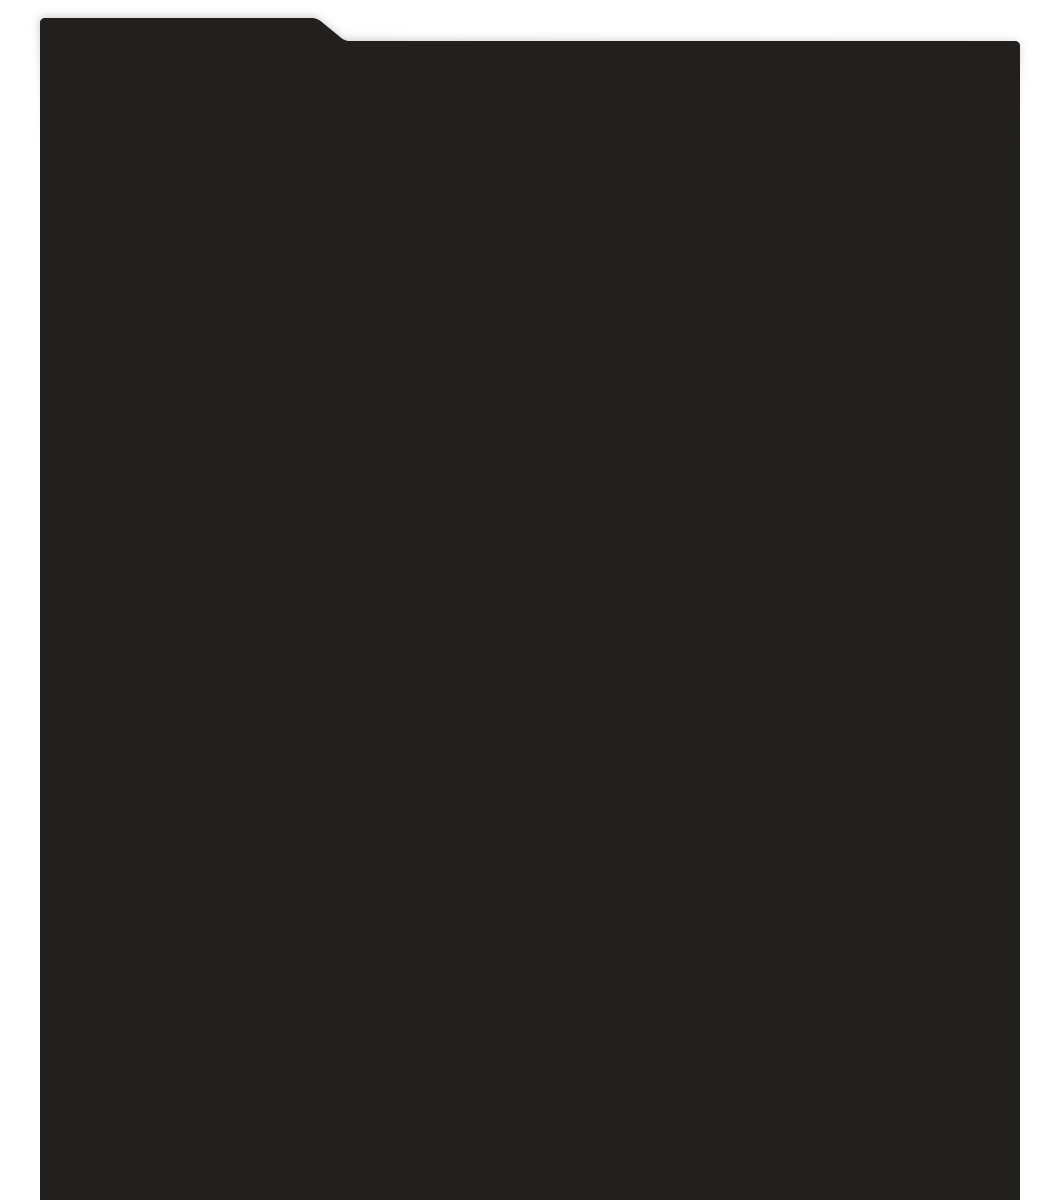
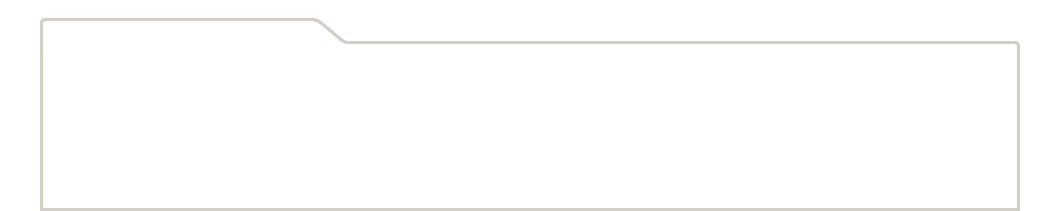
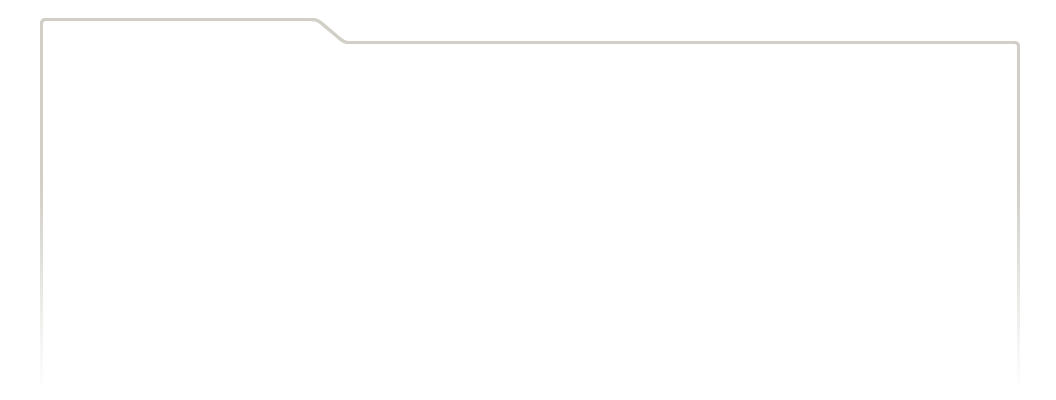
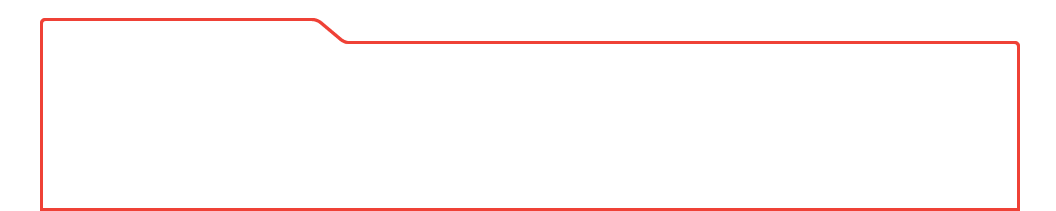
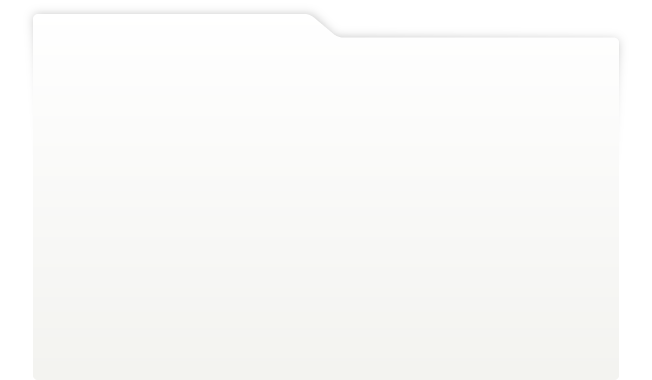
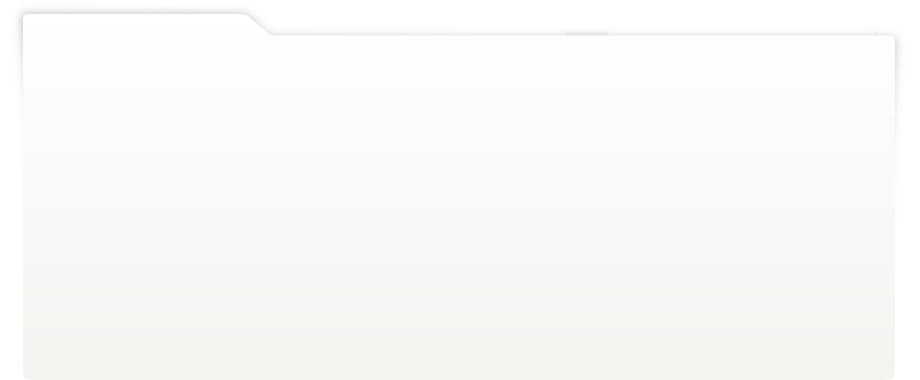
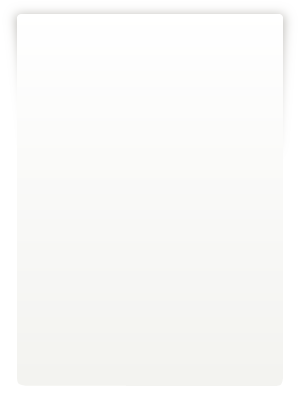
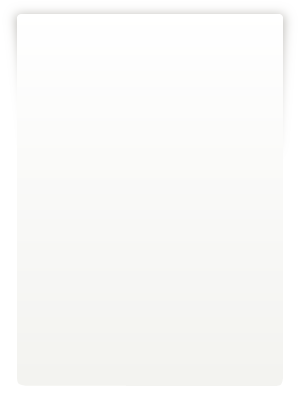
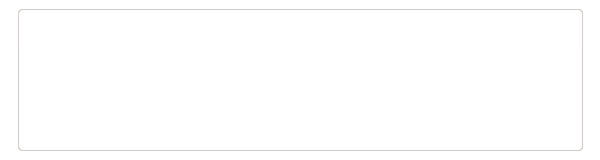
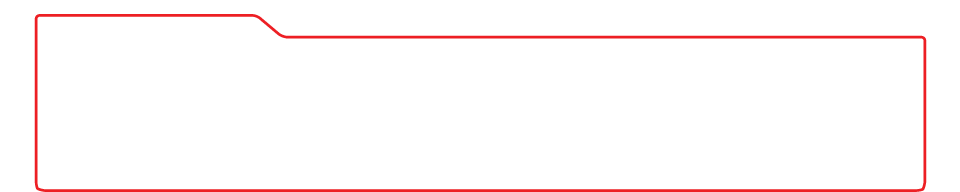
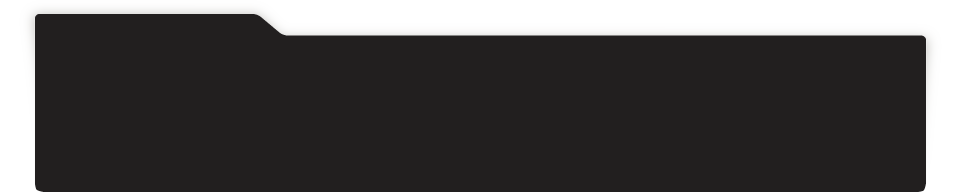
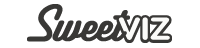
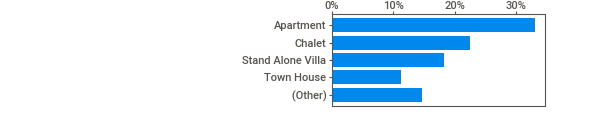
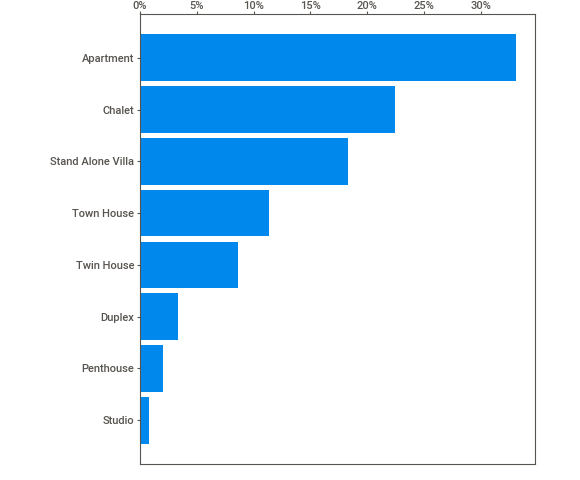
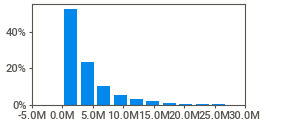
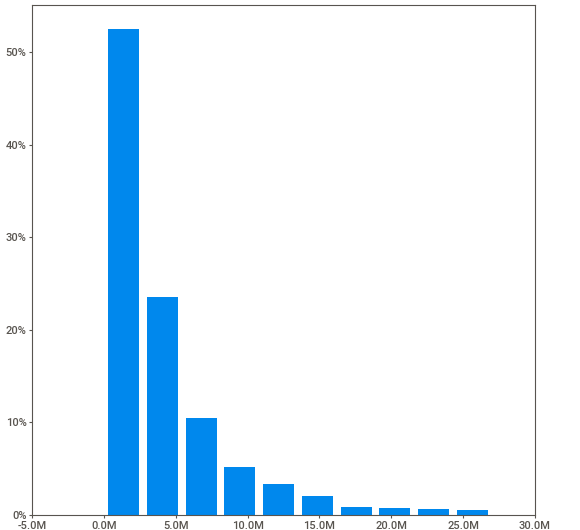
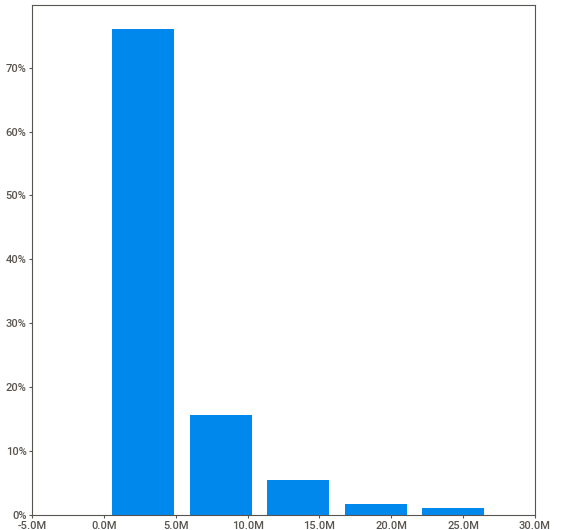
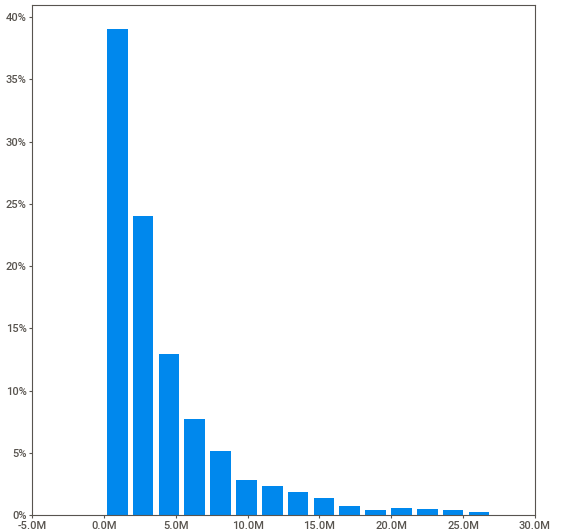
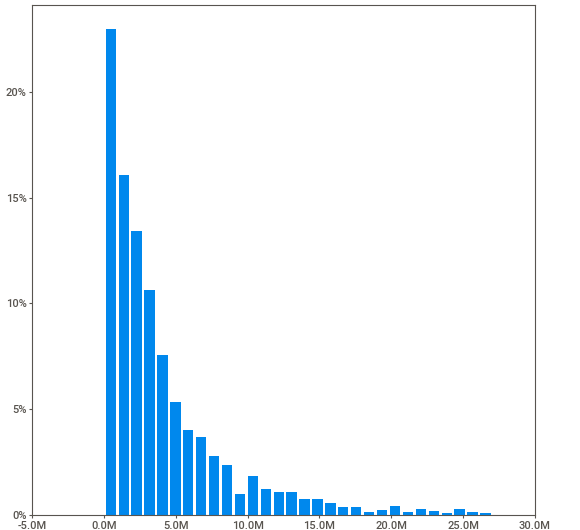
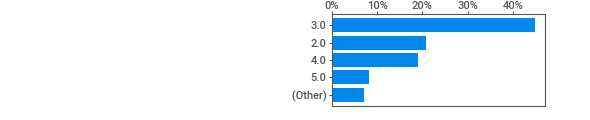
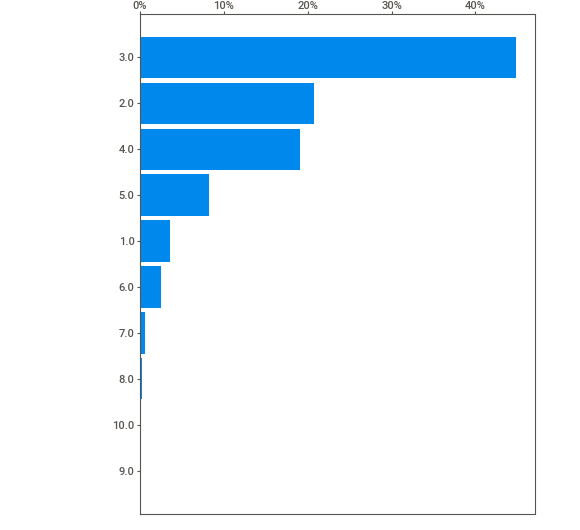
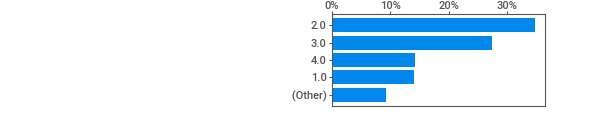
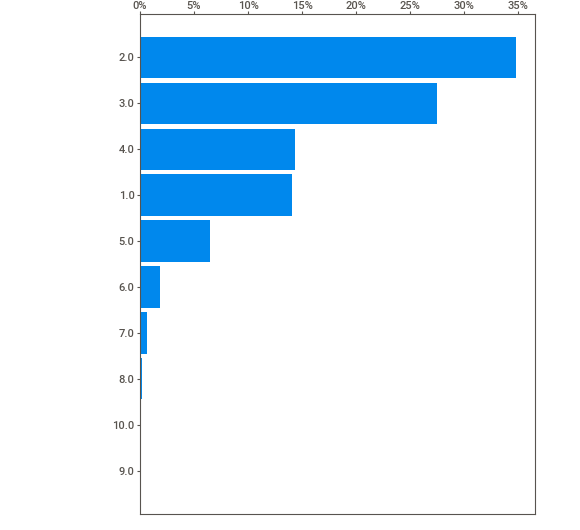
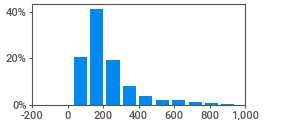
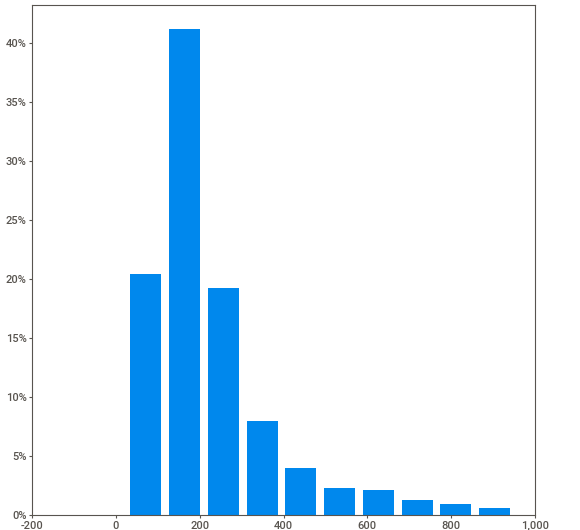
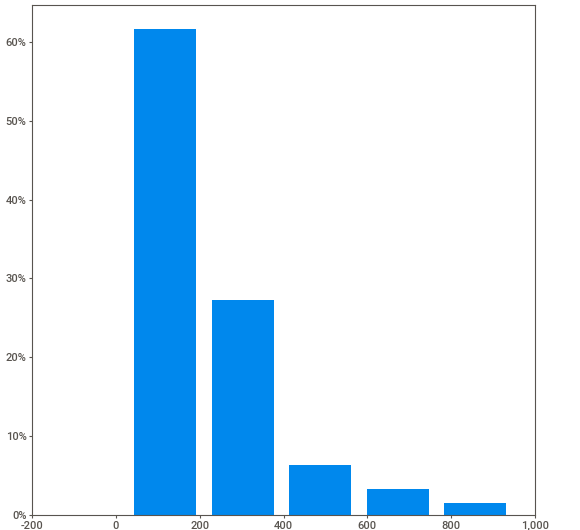
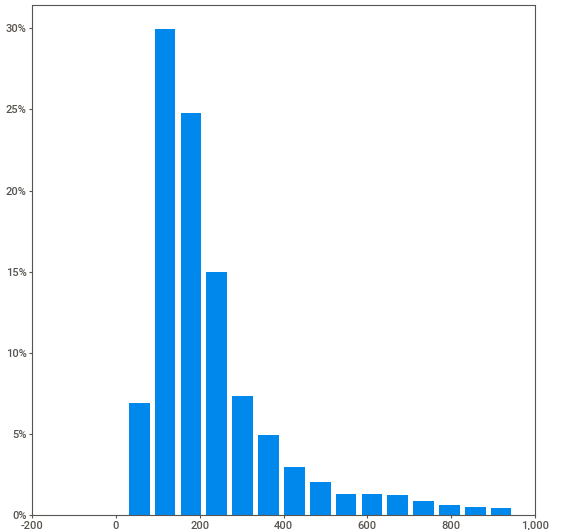
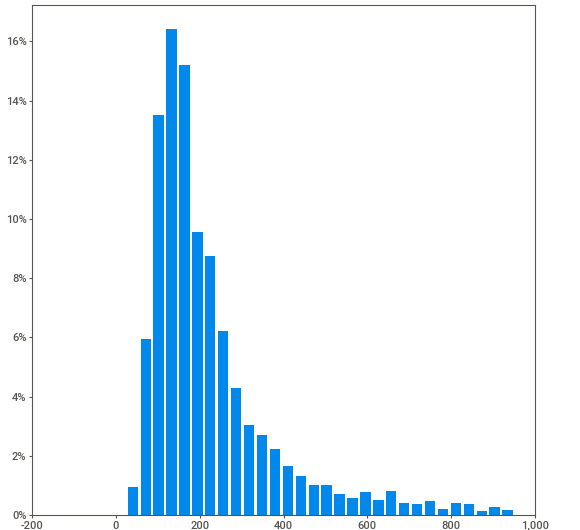
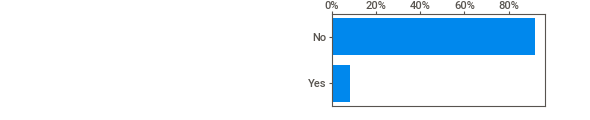
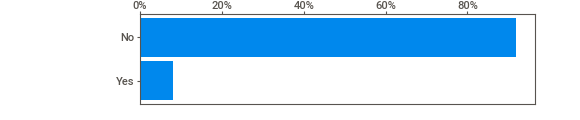
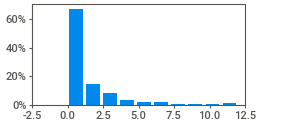
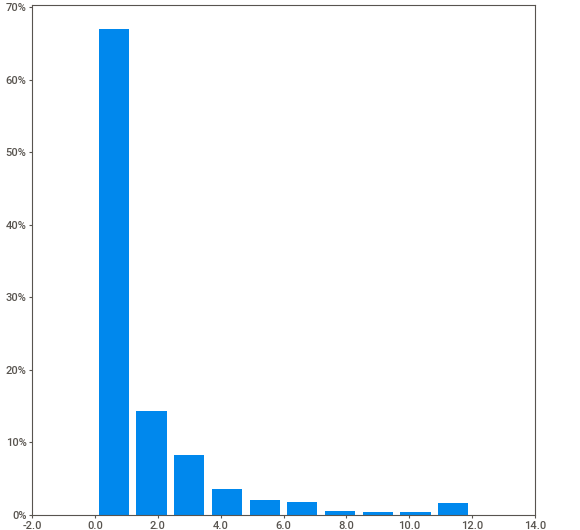
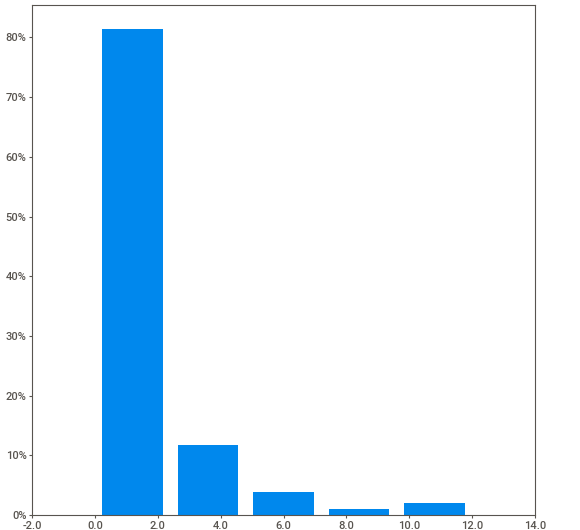
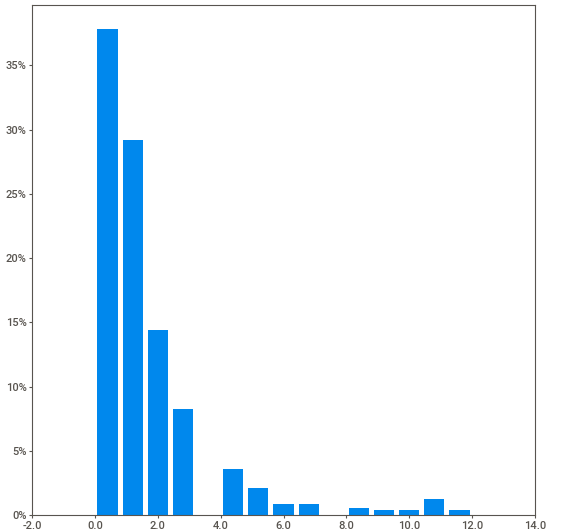
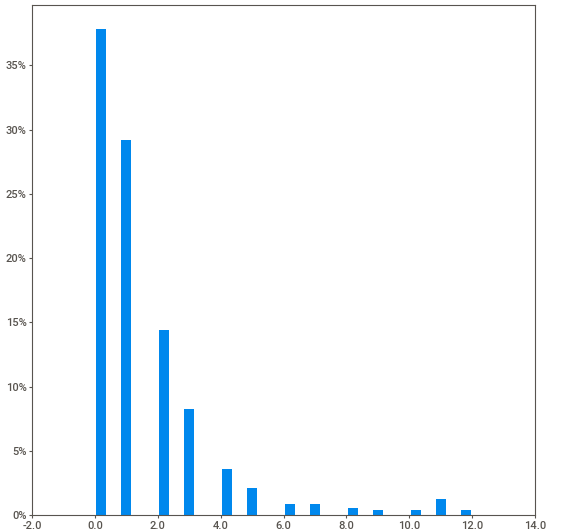
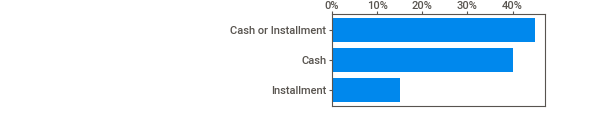
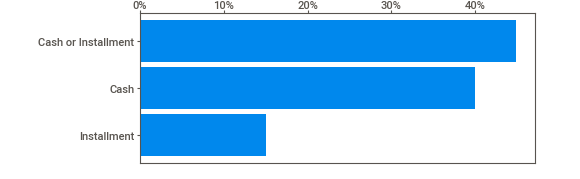
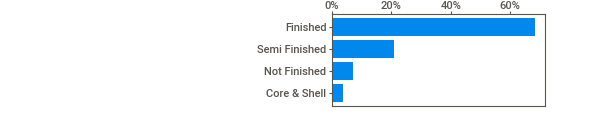
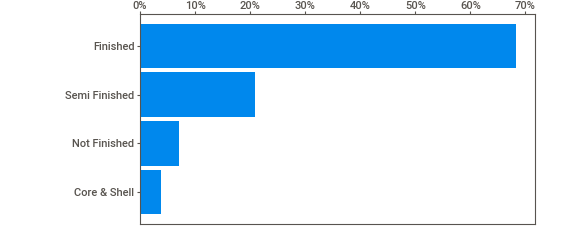
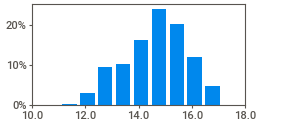
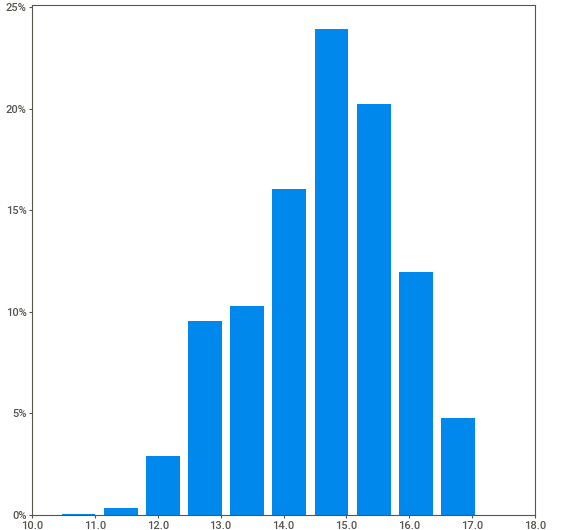
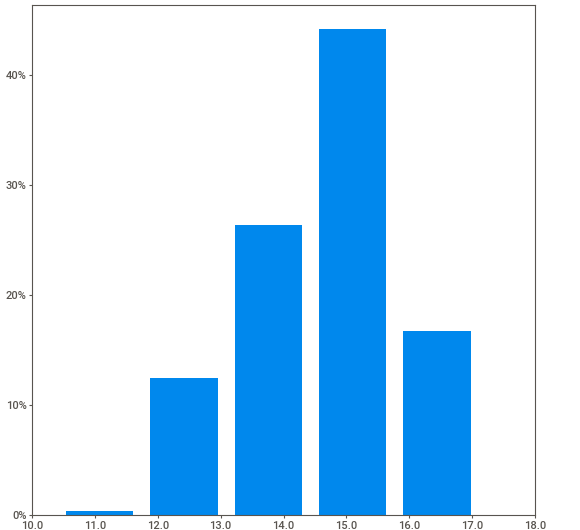
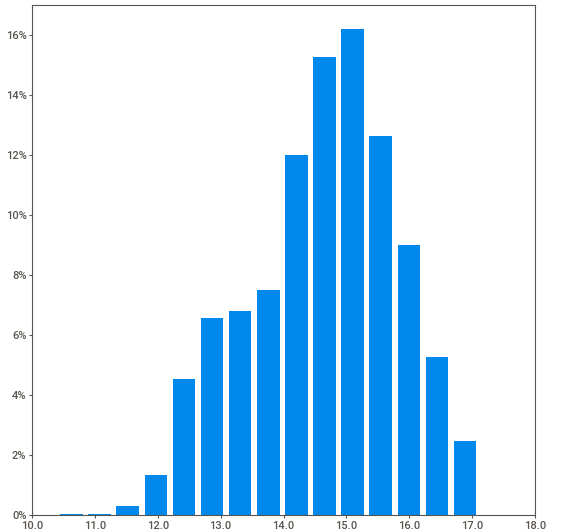
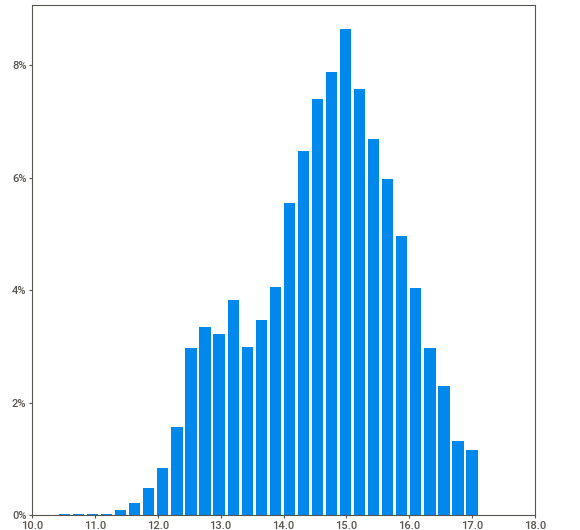
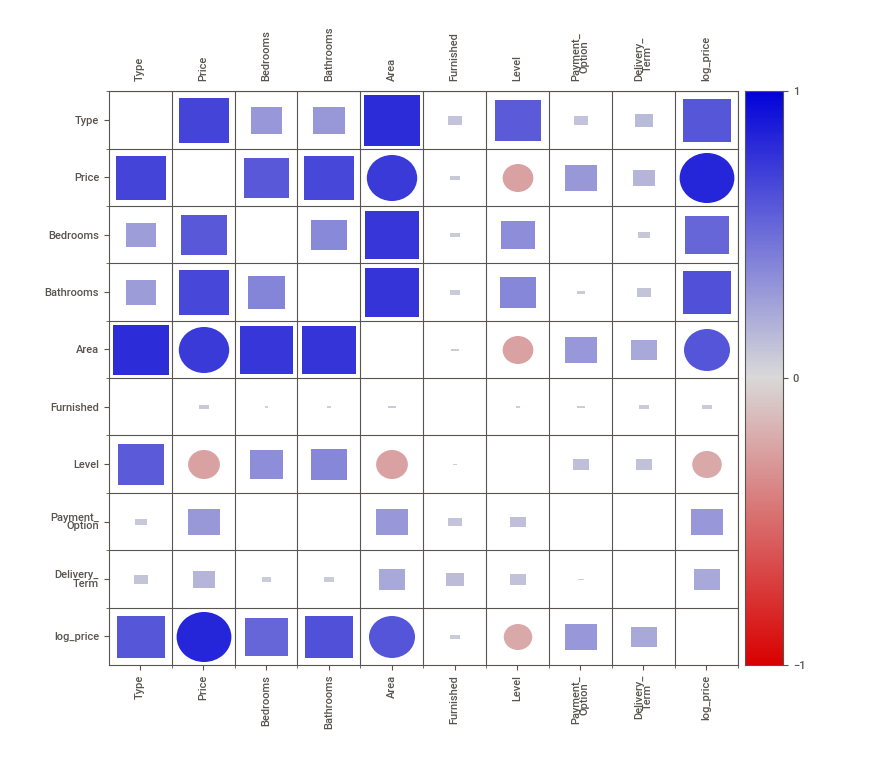
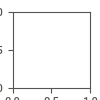

In [168]:
import sweetviz

report = sweetviz.analyze(new_df)
report.show_html('analyze.html', open_browser=True)

report.show_notebook(layout='vertical', w=1500, h=500, scale=0.9)